## Set up environment

In [1]:
# Set up environment
import warnings;
warnings.filterwarnings('ignore');
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";
import pandas as pd
import os.path as op
import os
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
import nipype.interfaces.freesurfer as fs
import csv
import scipy
from scipy import stats
from numpy import *
from matplotlib.lines import Line2D;
import s3fs
from sklearn import preprocessing
import statsmodels.formula.api as smf
import permutation_test as p
import statistics
import itertools

fs = s3fs.S3FileSystem()

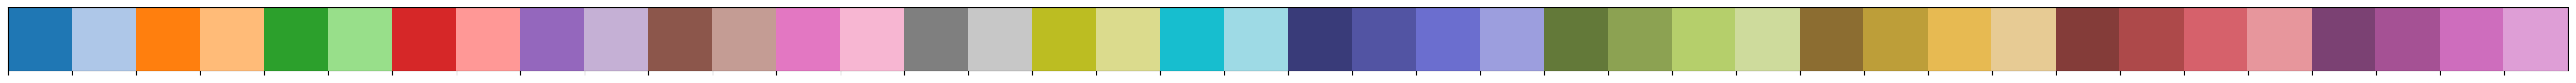

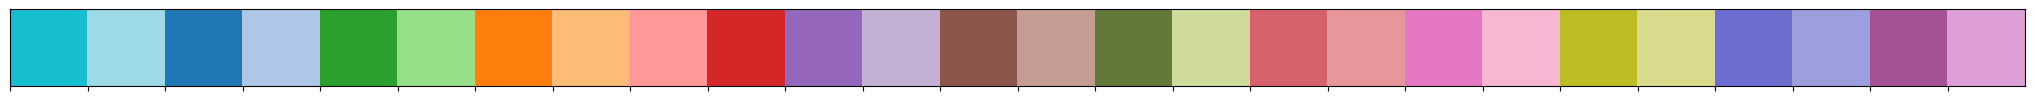

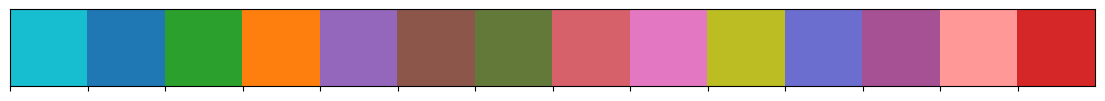

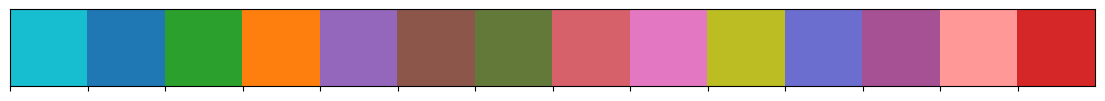

In [2]:
#plotting parameters, these will be the same for all plots

bundles = ['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 
                  'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pARCL', 'pARCR']    
rightBundles = ['AFR', 'ATRR', 'CCR', 'CSR', 'FcMi', 'FcMa', 'IFOFR', 'ILFR', 'MLFR', 'ORR', 'pARCR', 'SLFR', 'UNCR', 'VOFR']
leftBundles = ['AFL', 'ATRL', 'CCL', 'CSL', 'FcMi', 'FcMa', 'IFOFL', 'ILFL', 'MLFL', 'ORL', 'pARCL', 'SLFL', 'UNCL', 'VOFL']


tractPosHorz = {'AF': (0,0), 'ATR': (0, 1), 'CC': (0, 2), 'CS': (0, 3), 
            'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR': (1,3),
            'SLF': (2, 0),  'UNC':(2,1), 'VOF': (2, 2), 'pARC': (2,3),
            'FcMi': (3, 1), 'FcMa': (3, 2)};

tracts=['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF', 'OR', 'SLF', 'UNC', 'VOF', 'pARC', 'FcMi', 'FcMa']
colors=['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive', 'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

color_list_all=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete=color_list_all
color_list_chosen=color_list_all[18:20]
color_list_chosen.extend(color_list_all[0:2])
color_list_chosen.extend(color_list_all[4:6])
color_list_chosen.extend(color_list_all[2:4])
color_list_chosen.extend(color_list_all[7:8])
color_list_chosen.extend(color_list_all[6:7])
color_list_chosen.extend(color_list_all[8:10])
color_list_chosen.extend(color_list_all[10:12])
color_list_chosen.extend(color_list_all[24:25])
color_list_chosen.extend(color_list_all[27:28])
color_list_chosen.extend(color_list_all[34:35])
color_list_chosen.extend(color_list_all[35:36])
color_list_chosen.extend(color_list_all[12:14])
color_list_chosen.extend(color_list_all[16:18])
color_list_chosen.extend(color_list_all[22:23])
color_list_chosen.extend(color_list_all[23:24])
color_list_chosen.extend(color_list_all[37:38])
color_list_chosen.extend(color_list_all[39:40])

sns.palplot(color_list_all)
sns.palplot(color_list_chosen)
color_list_all=color_list_chosen
color_order=[19, 18, 1, 0, 5, 4, 3, 2, 7, 6, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22]

color_list_nohemis=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete_nohemis=color_list_nohemis
color_list_chosen_nohemis=color_list_nohemis[18:19]
color_list_chosen_nohemis.extend(color_list_nohemis[0:1])
color_list_chosen_nohemis.extend(color_list_nohemis[4:5])
color_list_chosen_nohemis.extend(color_list_nohemis[2:3])
color_list_chosen_nohemis.extend(color_list_nohemis[8:9])
color_list_chosen_nohemis.extend(color_list_nohemis[10:11])
color_list_chosen_nohemis.extend(color_list_nohemis[24:25])
color_list_chosen_nohemis.extend(color_list_nohemis[34:35])
color_list_chosen_nohemis.extend(color_list_nohemis[12:13])
color_list_chosen_nohemis.extend(color_list_nohemis[16:17])
color_list_chosen_nohemis.extend(color_list_nohemis[22:23])
color_list_chosen_nohemis.extend(color_list_nohemis[37:38])
color_list_chosen_nohemis.extend(color_list_nohemis[7:8])
color_list_chosen_nohemis.extend(color_list_nohemis[6:7])
sns.palplot(color_list_chosen_nohemis)

color_order2=[19, 18, 5, 4, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22, 7, 6]

color_list_3=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete3=color_list_3
color_list_chosen3=color_list_3[18:19]
color_list_chosen3.extend(color_list_3[0:1])
color_list_chosen3.extend(color_list_3[4:5])
color_list_chosen3.extend(color_list_3[2:3])
color_list_chosen3.extend(color_list_3[8:9])
color_list_chosen3.extend(color_list_3[10:11])
color_list_chosen3.extend(color_list_3[24:25])
color_list_chosen3.extend(color_list_3[34:35])
color_list_chosen3.extend(color_list_3[12:13])
color_list_chosen3.extend(color_list_3[16:17])
color_list_chosen3.extend(color_list_3[22:23])
color_list_chosen3.extend(color_list_3[37:38])
color_list_chosen3.extend(color_list_3[7:8])
color_list_chosen3.extend(color_list_3[6:7])
sns.palplot(color_list_chosen3)


color_order3=[19, 1, 5, 3, 9, 11, 25, 35, 13, 17, 23, 38, 8, 7]

## Load input data

In [9]:
#Load all data from local folder

# load participant information from local folder
parts = pd.read_csv('./inputData/participants.tsv', sep='\t')

#load QC data from local folder
QC = pd.read_csv('./inputData/QC_combined.csv', index_col=0)

#load session information from local folder
sessions = pd.read_csv('./inputData/sessions.csv')

sessions.rename(columns={"Unnamed: 0": "session_index"}, inplace=True)

#load tract profiles from local folder
tract_profiles = pd.read_csv("./inputData/t1t2_tract_profiles_combined.csv", index_col=0)

#load streamline count from local folder
sl_count = pd.read_csv("./inputData/sl_count.csv", index_col=0)

#load behavioral data from local folder
BehavData = pd.read_csv("./inputData/bsid_iii01.csv", index_col=0)

#load behavioral data from local folder
matchedData=pd.read_csv('./inputData/matched_data_final.csv')

## Quality control

In [10]:
# Perform quality control

#merge session and QC data, set QC treshhold

sessionsQC = pd.merge(QC, sessions, on=["session_id","participant_id"], how="inner")
sessionsQC.shape
#sessionsQC.head(20)
sessionsQC["qc_dmri_eddy_abs_motion"].mean()
sessionsQC["qc_dmri_eddy_abs_motion"].std()
motion_cutoff=sessionsQC["qc_dmri_eddy_abs_motion"].mean()+2*sessionsQC["qc_dmri_eddy_abs_motion"].std()
print(motion_cutoff)
sessionsQC["qc_dmri_eddy_percent_outlier_slices"].mean()
sessionsQC["qc_dmri_eddy_percent_outlier_slices"].std()
outlier_cutoff=sessionsQC["qc_dmri_eddy_percent_outlier_slices"].mean()+2*sessionsQC["qc_dmri_eddy_percent_outlier_slices"].std()
print(outlier_cutoff)

sessions_afterQC=sessionsQC[sessionsQC["qc_dmri_eddy_abs_motion"]<motion_cutoff]
sessions_afterQC=sessions_afterQC[sessions_afterQC["qc_dmri_eddy_percent_outlier_slices"]<outlier_cutoff]
sessions_afterQC.shape
sessionsAfterQC=sessions[sessions["session_id"].isin(sessions_afterQC["session_id"])]
sessionsAfterQC.shape
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00530XX11'];
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00129AN14'];
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00822XX14'];
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00766XX16'];
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00572CN12'];
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00517XX14'];
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00124XX09'];
sessionsAfterQC=sessionsAfterQC[sessionsAfterQC['participant_id']!='CC00143BN12'];
sessionsAfterQC.shape

# load sl count for local storage and remove bundles with fever than 11 streamlines
subjects = pd.merge(parts, sessionsAfterQC, on="participant_id", how="inner")
subjects=subjects[subjects["session_id"].isin(tract_profiles["sessionID"])]

subjects.rename(columns={"participant_id": "subjectID"}, inplace=True)
subjects.rename(columns={"session_id": "sessionID"}, inplace=True)
subjects.to_csv("/home/ae-grotheer/Storage/projects/dHCP/FinalPipeline/rel2/subjects.csv")
#subjects.head()

allDataMerged=pd.merge(tract_profiles,subjects,on=['subjectID','sessionID'])
allDataMerged.head()
allDataMerged.shape

sl_count_all=pd.read_csv("./inputData/sl_count.csv")
low_sl_count=sl_count_all[sl_count_all['n_streamlines']<=10]['subjectID'].unique()
low_sl_count.shape

allDataCleaned=allDataMerged[~allDataMerged["subjectID"].isin(low_sl_count)]
allDataCleaned.shape

subjects.shape
subjectsCleaned=subjects[~subjects["subjectID"].isin(low_sl_count)]
subjectsCleaned.shape

tract_profilesCleaned=tract_profiles[~tract_profiles["subjectID"].isin(low_sl_count)]
#tract_profilesCleaned.shape

sessionsAfterQC.shape
sessionsCleaned=sessionsAfterQC[~sessionsAfterQC["participant_id"].isin(low_sl_count)]
sessionsCleaned.shape

(490, 45)

1.9578367346938776

0.901350392204468

3.7605375191028134


4.484728061224489

1.772247372743607

8.029222806711703


(450, 45)

(450, 8)

(441, 8)

,t1wt2w,nodeID,subjectID,sessionID,gender,birth_age,birth_weight,singleton,session_index,scan_age,scan_head_circumference,scan_number,radiology_score,sedation
0,1.138851,0,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0
1,0.866821,1,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0
2,0.799892,2,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0
3,0.793592,3,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0
4,0.807984,4,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0


(1071200, 14)

(111,)

(808600, 14)

(412, 12)

(311, 12)

(441, 8)

(329, 8)

## Longi subjects

In [11]:
# Identify longi subjects
subjectsCleaned.shape
subjectsCleaned.shape
subjectsCleaned['subjectID'].unique().shape
subjectsCleaned['gender'].value_counts()
subjectsCleaned["birth_age"].min()
subjectsCleaned["birth_age"].max()
subjectsCleaned['scan_age'].min()
subjectsCleaned['scan_age'].max()

subjectsCLeanedLongi=subjectsCleaned[subjectsCleaned.duplicated(subset="subjectID")]
subjectsCLeanedLongi.shape

subjectsCleaned["isLongi"]=subjectsCleaned["subjectID"].isin(subjectsCLeanedLongi["subjectID"])
subjectsCleaned["isLongi"]=subjectsCleaned["isLongi"].astype(int)

(311, 12)

(311, 12)

(285,)

gender
Male      182
Female    129
Name: count, dtype: int64

24.571428571429

42.285714285714

29.285714285714

44.71428571428601

(26, 12)

## Non-longi subjects

In [12]:
# Distribution of non longi subjects 

#subjectsCLeanedNoLongi=subjectsCleaned[~subjectsCleaned.duplicated(subset="subjectID")]
subjectsCLeanedNoLongi=subjectsCleaned.drop((subjectsCleaned[subjectsCleaned['scan_number'] == 2]).index)
subjectsCLeanedNoLongi.shape
subjectsCLeanedNoLongi["timeAfterBirth"]=subjectsCLeanedNoLongi['scan_age']-subjectsCLeanedNoLongi['birth_age']

subjectsCLeanedNoLongi["birth_age"].min()
subjectsCLeanedNoLongi["birth_age"].max()
subjectsCLeanedNoLongi['birth_age'].mean()
statistics.stdev(subjectsCLeanedNoLongi['birth_age'])

subjectsCLeanedNoLongi['scan_age'].min()
subjectsCLeanedNoLongi['scan_age'].max()
subjectsCLeanedNoLongi['scan_age'].mean()
statistics.stdev(subjectsCLeanedNoLongi['scan_age'])

subjectsCLeanedNoLongi['timeAfterBirth'].min()
subjectsCLeanedNoLongi['timeAfterBirth'].max()
subjectsCLeanedNoLongi['timeAfterBirth'].mean()
statistics.stdev(subjectsCLeanedNoLongi['timeAfterBirth'])

#Find out gender distribution
subjectsCLeanedNoLongi['gender'].value_counts()

subjects = subjectsCLeanedNoLongi["subjectID"]

(279, 13)

24.571428571429

42.285714285714

38.0358422939068

3.7307764728396546

29.285714285714

44.71428571428601

39.57296466973887

3.094021303609054

-2.8421709430404007e-13

16.714285714285

1.5371223758320667

2.2113897183532627

gender
Male      161
Female    118
Name: count, dtype: int64

## White matter tract profiles

In [13]:
#Load and edit white matter tract profiles
tract_profilesCleaned = pd.read_csv('./inputData/TractProfilesCleaned.csv', index_col=None)

#Delete nodes 0-4 and 95-100 to prevent partial volume effects
nodes_to_remove = list(range(0, 5)) + list(range(95, 100))
tract_profilesCleanedCut = tract_profilesCleaned[~tract_profilesCleaned['nodeID'].isin(nodes_to_remove)]
tract_profilesCleanedCut

#Take mean of 100 nodes
TractProfilesMeanCut=tract_profilesCleanedCut.groupby(['subjectID', 'sessionID', 'tractID'], as_index=False).mean(['t1wt2w'])
TractProfilesMeanCut

,tractID,t1wt2w,nodeID,subjectID,sessionID
5,AFR,0.824464,5,CC00549XX22,157600
6,AFR,0.830359,6,CC00549XX22,157600
7,AFR,0.843799,7,CC00549XX22,157600
8,AFR,0.851046,8,CC00549XX22,157600
9,AFR,0.873338,9,CC00549XX22,157600
...,...,...,...,...,...
899590,VOFR,0.626755,90,CC00740XX15,238400
899591,VOFR,0.636074,91,CC00740XX15,238400
899592,VOFR,0.646825,92,CC00740XX15,238400
899593,VOFR,0.659593,93,CC00740XX15,238400


,subjectID,sessionID,tractID,t1wt2w,nodeID
0,CC00060XX03,12501,AFL,0.793925,49.5
1,CC00060XX03,12501,AFR,0.781719,49.5
2,CC00060XX03,12501,ATRL,1.154485,49.5
3,CC00060XX03,12501,ATRR,1.046256,49.5
4,CC00060XX03,12501,CCL,0.822756,49.5
...,...,...,...,...,...
8991,CC00907XX16,4230,UNCR,0.643183,49.5
8992,CC00907XX16,4230,VOFL,0.473464,49.5
8993,CC00907XX16,4230,VOFR,0.473878,49.5
8994,CC00907XX16,4230,pARCL,0.484191,49.5


## Cortical endpoints

In [14]:
#Load data
endpoint_profiles_all = pd.read_csv("./inputData/endpoint_profiles_all.csv", index_col=None)

# Combine both hemispheres
endpoint_profiles_all['t1t2w_GM'] = endpoint_profiles_all[['t1wt2wValues_LH', 't1wt2wValues_RH']].sum(axis=1, skipna=True)

# Compute weighted average T1w/T2w per subject/session/tract
WeightedAverageT1T2wSurface = (
    endpoint_profiles_all
    .groupby(['subjectID', 'sessionID', 'tractID'], as_index=False)
    .apply(lambda x: pd.Series({
        'WeAvGMT1wT2w': np.average(x['t1t2w_GM'], weights=x['endpointdensity'])
    }))
    .reset_index(drop=True)
)

# Result
WeightedAverageT1T2wSurface

,subjectID,sessionID,tractID,WeAvGMT1wT2w
0,CC00060XX03,12501,AFL,1.242679
1,CC00060XX03,12501,AFR,1.252631
2,CC00060XX03,12501,ATRL,1.199646
3,CC00060XX03,12501,ATRR,1.213604
4,CC00060XX03,12501,CCL,1.246698
...,...,...,...,...
10109,CC00907XX16,4230,UNCR,1.032839
10110,CC00907XX16,4230,VOFL,1.013902
10111,CC00907XX16,4230,VOFR,0.992448
10112,CC00907XX16,4230,pARCL,0.996819


## Combining cortical and white matter T1w/T2w

In [15]:
# Merge tract and endpoint profiles on subject/session/tract
T1wT2wBothWeAve = (
    WeightedAverageT1T2wSurface
    .merge(TractProfilesMeanCut[['subjectID', 'sessionID', 'tractID', 't1wt2w']], 
           on=['subjectID', 'sessionID', 'tractID'])
    .merge(subjectsCLeanedNoLongi[['subjectID', 'sessionID']], 
           on=['subjectID', 'sessionID'])
)

# Compute average across subjects for each tract
AveSubT1wT2wBothWeAve = (T1wT2wBothWeAve.groupby('tractID', as_index=False)[['WeAvGMT1wT2w', 't1wt2w']].mean())

# Result
AveSubT1wT2wBothWeAve

,tractID,WeAvGMT1wT2w,t1wt2w
0,AFL,1.173367,0.749378
1,AFR,1.232613,0.737887
2,ATRL,1.155145,1.039408
3,ATRR,1.183726,1.031469
4,CCL,1.226182,0.754019
5,CCR,1.207230,0.743100
6,CSL,1.347800,1.426834
7,CSR,1.362069,1.386767
8,FcMa,1.167727,0.766705
9,FcMi,1.168305,0.662235


In [25]:
# Compute Pearson r, p, and r² for each subject
results = []
for sub in T1wT2wBothWeAve['subjectID'].unique():
    sub_data = T1wT2wBothWeAve[T1wT2wBothWeAve['subjectID'] == sub]
    r, p_val = stats.pearsonr(sub_data['WeAvGMT1wT2w'], sub_data['t1wt2w'])
    results.append({
        'subjectID': sub,
        'r2': r**2,
        'p': p_val
    })

# Convert to DataFrame
df_stats = pd.DataFrame(results)

# Output top-level stats
best_subject = df_stats.loc[df_stats['r2'].idxmax()]
worst_subject = df_stats.loc[df_stats['r2'].idxmin()]
mean_r2 = df_stats['r2'].mean()
mean_p = df_stats['p'].mean()
significant_count = (df_stats['p'] < 0.05).sum()
total_subjects = df_stats['p'].count()

# Display results
print("Best subject:\n", best_subject)
print("Worst subject:\n", worst_subject)
print("Mean p:", mean_p)
print("Subjects with p < 0.05:", significant_count)
print("Total subjects:", total_subjects)

Best subject:
 subjectID    CC00457XX12
r2              0.679218
p                    0.0
Name: 160, dtype: object
Worst subject:
 subjectID    CC00723XX14
r2              0.017455
p               0.519981
Name: 235, dtype: object
Mean p: 0.008433835662080117
Subjects with p < 0.05: 265
Total subjects: 273


In [26]:
# Use the pandas Series directly for convenience
r2_values = df_stats['r2']

# Compute and print summary statistics
print(f"Mean r²:      {r2_values.mean():.4f}")
print(f"Median r²:    {r2_values.median():.4f}")

try:
    mode_r2 = statistics.mode(r2_values)
    print(f"Mode r²:      {mode_r2:.4f}")
except statistics.StatisticsError:
    print("Mode r²:      No unique mode found")

print(f"Std Dev r²:   {r2_values.std():.4f}")
print(f"Variance r²:  {r2_values.var():.4f}")

# Range function (revised for clarity)
def describe_range(series):
    min_val = series.min()
    max_val = series.max()
    value_range = max_val - min_val
    return min_val, max_val, value_range

r2_min, r2_max, r2_range = describe_range(r2_values)
print(f"Range r²:     min={r2_min:.4f}, max={r2_max:.4f}, range={r2_range:.4f}")

Mean r²:      0.4216
Median r²:    0.4272
Mode r²:      0.5239
Std Dev r²:   0.1319
Variance r²:  0.0174
Range r²:     min=0.0175, max=0.6792, range=0.6618


## Behavioral data

In [202]:
# Select and rename relevant columns
BehavDataAllScores = (
    BehavData[['src_subject_id', 'interview_age', 'sex', 'bsid_mot_sumscaled',
               'bsid_lang_sumscaled', 'bsid_cog_sumscaled']]
    .copy()
)
BehavDataAllScores['subjectID'] = BehavDataAllScores['src_subject_id'].str.lstrip('sub-')
BehavDataAllScores.drop(columns='src_subject_id', inplace=True)

# Merge behavioral and myelin data
BehavDataAllScoresMyelin = pd.merge(
    BehavDataAllScores,
    T1wT2wBothWeAve[['subjectID', 'tractID', 'WeAvGMT1wT2w', 't1wt2w']],
    on='subjectID'
)
BehavDataAllScoresMyelin

BehavDataAllScoresMyelin['interview_age'] = BehavDataAllScoresMyelin['interview_age'].astype(int)
BehavDataAllScoresMyelin['bsid_lang_sumscaled'] = BehavDataAllScoresMyelin['bsid_lang_sumscaled'].astype(int)
BehavDataAllScoresMyelin['bsid_cog_sumscaled'] = BehavDataAllScoresMyelin['bsid_cog_sumscaled'].astype(int)
BehavDataAllScoresMyelin['bsid_mot_sumscaled'] = BehavDataAllScoresMyelin['bsid_mot_sumscaled'].astype(int)

# Average myelin values per motor score and subject
BehavDataAllScoresMean = (
    BehavDataAllScoresMyelin
    .groupby(['subjectID', 'bsid_mot_sumscaled', 'bsid_lang_sumscaled', 'bsid_cog_sumscaled'], as_index=False)
    .mean(numeric_only=True)  
)
BehavDataAllScoresMean

#Merge dataframe with computed r²s 
BehavDataAllScoresR2s = pd.merge(BehavDataAllScoresMean, df_stats, on=['subjectID'])
BehavDataAllScoresR2s

,interview_age,sex,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,subjectID,tractID,WeAvGMT1wT2w,t1wt2w
0,18,M,19,13,8,CC00067XX10,AFL,1.117123,0.658282
1,18,M,19,13,8,CC00067XX10,AFR,1.198274,0.569677
2,18,M,19,13,8,CC00067XX10,ATRL,1.070969,0.952369
3,18,M,19,13,8,CC00067XX10,ATRR,1.081222,0.917043
4,18,M,19,13,8,CC00067XX10,CCL,1.146777,0.656323
...,...,...,...,...,...,...,...,...,...
5585,21,M,25,34,14,CC00907XX16,UNCR,1.032839,0.643183
5586,21,M,25,34,14,CC00907XX16,VOFL,1.013902,0.473464
5587,21,M,25,34,14,CC00907XX16,VOFR,0.992448,0.473878
5588,21,M,25,34,14,CC00907XX16,pARCL,0.996819,0.484191


,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w
0,CC00060XX03,16,11,8,19.0,1.253620,0.849098
1,CC00063AN06,25,22,11,19.0,1.114477,0.611412
2,CC00065XX08,20,19,12,18.0,1.284727,0.832711
3,CC00066XX09,22,22,9,18.0,1.307459,0.847321
4,CC00067XX10,19,13,8,18.0,1.155027,0.725021
...,...,...,...,...,...,...,...
210,CC00845AN21,20,19,13,20.0,1.082344,0.683652
211,CC00845BN21,20,20,14,20.0,1.117321,0.715423
212,CC00852XX11,16,20,8,20.0,1.342871,0.978292
213,CC00879XX22,20,26,10,18.0,1.248763,0.834134


,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
0,CC00060XX03,16,11,8,19.0,1.253620,0.849098,0.523879,0.000029
1,CC00063AN06,25,22,11,19.0,1.114477,0.611412,0.508191,0.000044
2,CC00065XX08,20,19,12,18.0,1.284727,0.832711,0.277790,0.005665
3,CC00066XX09,22,22,9,18.0,1.307459,0.847321,0.313218,0.002951
4,CC00067XX10,19,13,8,18.0,1.155027,0.725021,0.372938,0.000921
...,...,...,...,...,...,...,...,...,...
210,CC00845AN21,20,19,13,20.0,1.082344,0.683652,0.383540,0.000742
211,CC00845BN21,20,20,14,20.0,1.117321,0.715423,0.356974,0.001269
212,CC00852XX11,16,20,8,20.0,1.342871,0.978292,0.466654,0.000120
213,CC00879XX22,20,26,10,18.0,1.248763,0.834134,0.565069,0.000010


In [36]:
# Descriptive stats
age_min = BehavDataAllScoresMyelin['interview_age'].min()
age_max = BehavDataAllScoresMyelin['interview_age'].max()
age_range = age_max - age_min
age_mean = BehavDataAllScoresMyelin['interview_age'].mean()
age_std = statistics.stdev(BehavDataAllScoresMyelin['interview_age'])

print(f"Min Age: {age_min}")
print(f"Max Age: {age_max}")
print(f"Age Range: {age_range}")
print(f"Mean Age: {age_mean:.2f}")
print(f"Age Std Dev: {age_std:.2f}")

Min Age: 17
Max Age: 25
Age Range: 8
Mean Age: 19.15
Age Std Dev: 1.39


In [162]:
#Find out how many premature infants are included in the dataset
BehavDataAge = pd.merge(
    BehavDataAllScoresR2s, 
    subjectsCLeanedNoLongi,
    on='subjectID')

BehavDataAge

sum(i < 37 for i in BehavDataAge['birth_age'])

,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p,gender,...,singleton,session_index,sessionID,scan_age,scan_head_circumference,scan_number,radiology_score,sedation,isLongi,timeAfterBirth
0,CC00060XX03,16,11,8,19.0,1.253620,0.849098,0.523879,0.000029,Female,...,Single,0,12501,40.285714,34.0,1,2,0,0,0.142857
1,CC00063AN06,25,22,11,19.0,1.114477,0.611412,0.508191,0.000044,Female,...,Multiple,0,15102,35.714286,32.0,1,1,0,0,0.571429
2,CC00065XX08,20,19,12,18.0,1.284727,0.832711,0.277790,0.005665,Male,...,Single,0,18600,40.714286,34.0,1,2,0,0,0.285714
3,CC00066XX09,22,22,9,18.0,1.307459,0.847321,0.313218,0.002951,Male,...,Single,0,19200,38.428571,33.0,1,4,0,0,0.142857
4,CC00067XX10,19,13,8,18.0,1.155027,0.725021,0.372938,0.000921,Male,...,Single,0,20200,40.142857,34.0,1,1,0,0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,CC00845AN21,20,19,13,20.0,1.082344,0.683652,0.383540,0.000742,Male,...,Multiple,0,26510,35.571429,30.0,1,1,0,1,0.714286
211,CC00845BN21,20,20,14,20.0,1.117321,0.715423,0.356974,0.001269,Male,...,Multiple,0,26410,35.571429,30.0,1,1,0,1,0.714286
212,CC00852XX11,16,20,8,20.0,1.342871,0.978292,0.466654,0.000120,Female,...,Single,0,28210,43.428571,36.0,1,1,0,0,3.428571
213,CC00879XX22,20,26,10,18.0,1.248763,0.834134,0.565069,0.000010,Female,...,Single,0,7430,43.714286,37.0,1,1,0,0,3.571429


55

## Slope Analysis

In [ ]:
# Merge scan/birth age into tract profiles
age_info = pd.merge(
    tract_profilesCleanedCut,
    subjectsCLeanedNoLongi[['subjectID', 'sessionID', 'scan_age', 'birth_age']],
    on=['subjectID', 'sessionID']
)

# Merge with weighted average myelin values
slope_analyses = pd.merge(
    age_info,
    T1wT2wBothWeAve[['subjectID', 'sessionID', 'tractID', 'WeAvGMT1wT2w']],
    on=['subjectID', 'sessionID', 'tractID']
)

# Compute mean t1wt2w across nodes for each subject/session/tract
slope_analyses_mean = (
    slope_analyses
    .groupby(['subjectID', 'sessionID', 'tractID', 'WeAvGMT1wT2w', 'scan_age', 'birth_age'], as_index=False)
    .agg({'t1wt2w': 'mean'})
)

# Final result
slope_analyses_mean

In [ ]:
#Compute slope for scan age for T1w/T2w of white matter

tractCount=slope_analyses_mean['tractID'].unique()

coeff=[] #Creating arrays
se = []
coeffType=[]
tractTrack1=[]
intercept=[]
r2 = []
adjustR2 = []
aic = []
pvals=[]
    
for tract in tractCount:
        
    dfForStats=slope_analyses_mean[(slope_analyses_mean['tractID']==tract)]
    dfForStats.reset_index(level=0, inplace=True)

    scanAgeArray=np.array(dfForStats['scan_age'])
    scanAgeArray=scanAgeArray.reshape(1,-1)
    scanAgeNorm=preprocessing.normalize(scanAgeArray,axis=1)
    scanAgeNorm=scanAgeNorm.reshape(-1)
    dfForStats["scanAgeNorm"]=scanAgeNorm

    birthAgeArray=np.array(dfForStats['birth_age'])
    birthAgeArray=birthAgeArray.reshape(1,-1)
    birthAgeNorm=preprocessing.normalize(birthAgeArray,axis=1)
    birthAgeNorm=birthAgeNorm.reshape(-1)
    dfForStats["birthAgeNorm"]=birthAgeNorm
        
    t1wt2wArray=np.array(dfForStats['t1wt2w'])
    t1wt2wArray=t1wt2wArray.reshape(1,-1)
    t1wt2wNorm=preprocessing.normalize(t1wt2wArray,axis=1)
    t1wt2wNorm=t1wt2wNorm.reshape(-1)
    dfForStats["t1wt2wNorm"]=t1wt2wNorm

    df = dfForStats
    md = smf.ols(formula="t1wt2w~ 1 + scan_age", data=df) #Predicting dti_mdNorm through the other variables
    mdf = md.fit() # Actually commanding the linear analysis, it could be any other analysis method
    results=mdf.summary()

    # Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
    results_as_html = results.tables[1].as_html()
    LM_results=pd.read_html(results_as_html, header=0, index_col=0)[0]
        
    results_as_html_R2 = results.tables[0].as_html()
    LM_results_R2=pd.read_html(results_as_html_R2, index_col=0)[0]
        
    results_R2s=LM_results_R2[3]
    #LM_results.head()
    #LM_results_R2.head()
    #results_R2s.head()
        
    SE=LM_results['std err']
        
    inter=mdf.params['Intercept']
    intercept.append(inter)
        
    #SE.head()
    se.append(SE["scan_age"])
    coeff.append(mdf.params['scan_age'])
    coeff_type=3
    tractTrack1.append(tract)
    #nodeTrack1.append(node)
    coeffType.append(coeff_type) #Add another line below
    r2.append(results_R2s['Dep. Variable:'])
    adjustR2.append(results_R2s['Model:'])
    aic.append(results_R2s['No. Observations:']) 
    pvals.append(results_R2s['Date:'])        
        
print(mdf.summary())
df=pd.DataFrame(tractTrack1)
df.columns=['tractID']
df.insert(1,"coeffType",coeffType)
df.insert(2,"coeff",coeff)
df.insert(3,"se",se)
df.insert(4,"intercept",intercept)
df.insert(5,"r2",r2)
df.insert(6,"adjustR2",adjustR2)
df.insert(7,"aic",aic)
df.insert(8,"pvals",pvals)

os.makedirs('./outputData',exist_ok=True)
df.to_csv('./outputData/LM_result_scanAge_noNorm_WM_AverageSubj.csv')
df.head()
df.min(axis=0, numeric_only=True)
df.max(axis=0, numeric_only=True)
df.mean(axis=0, numeric_only=True)
dfScanAge=df
df.head()

statsPerBundle=df.groupby('tractID').mean()
statsPerBundle.head()
statsPerBundle.to_csv('./outputData/LM_result_scanAge_noNorm_meanPerBundle_WM_AverageSubj.csv')

In [ ]:
#Compute slope for scan age for T1w/T2w gray matter

tractCount=slope_analyses_mean['tractID'].unique()

coeff=[] #Creating arrays
se = []
coeffType=[]
tractTrack1=[]
intercept=[]
r2 = []
adjustR2 = []
aic = []
pvals=[]
    
for tract in tractCount:
        
    dfForStats=slope_analyses_mean[(slope_analyses_mean['tractID']==tract)]
    dfForStats.reset_index(level=0, inplace=True)

    scanAgeArray=np.array(dfForStats['scan_age'])
    scanAgeArray=scanAgeArray.reshape(1,-1)
    scanAgeNorm=preprocessing.normalize(scanAgeArray,axis=1)
    scanAgeNorm=scanAgeNorm.reshape(-1)
    dfForStats["scanAgeNorm"]=scanAgeNorm

    birthAgeArray=np.array(dfForStats['birth_age'])
    birthAgeArray=birthAgeArray.reshape(1,-1)
    birthAgeNorm=preprocessing.normalize(birthAgeArray,axis=1)
    birthAgeNorm=birthAgeNorm.reshape(-1)
    dfForStats["birthAgeNorm"]=birthAgeNorm
        
    t1wt2wArray=np.array(dfForStats['WeAvGMT1wT2w'])
    t1wt2wArray=t1wt2wArray.reshape(1,-1)
    t1wt2wNorm=preprocessing.normalize(t1wt2wArray,axis=1)
    t1wt2wNorm=t1wt2wNorm.reshape(-1)
    dfForStats["t1wt2wNorm"]=t1wt2wNorm
    #dfForStats.head()

    #dfForStats.to_csv('./'+tract+'_dataCleanedForLME.csv')
    df = dfForStats
    md = smf.ols(formula="WeAvGMT1wT2w~ 1 + scan_age", data=df) #Predicting dti_mdNorm through the other variables
    mdf = md.fit() # Actually commanding the linear analysis, it could be any other analysis method
    results=mdf.summary()

    # Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
    results_as_html = results.tables[1].as_html()
    LM_results=pd.read_html(results_as_html, header=0, index_col=0)[0]
        
    results_as_html_R2 = results.tables[0].as_html()
    LM_results_R2=pd.read_html(results_as_html_R2, index_col=0)[0]
        
    results_R2s=LM_results_R2[3]
    #LM_results.head()
    #LM_results_R2.head()
    #results_R2s.head()
        
    SE=LM_results['std err']
        
    inter=mdf.params['Intercept']
    intercept.append(inter)
        
    #SE.head()
    se.append(SE["scan_age"])
    coeff.append(mdf.params['scan_age'])
    coeff_type=3
    tractTrack1.append(tract)
    #nodeTrack1.append(node)
    coeffType.append(coeff_type) #Add another line below
    r2.append(results_R2s['Dep. Variable:'])
    adjustR2.append(results_R2s['Model:'])
    aic.append(results_R2s['No. Observations:']) 
    pvals.append(results_R2s['Date:'])        
        
print(mdf.summary())
df=pd.DataFrame(tractTrack1)
df.columns=['tractID']
df.insert(1,"coeffType",coeffType)
df.insert(2,"coeff_GM",coeff)
df.insert(3,"se",se)
df.insert(4,"intercept",intercept)
df.insert(5,"r2",r2)
df.insert(6,"adjustR2",adjustR2)
df.insert(7,"aic",aic)
df.insert(8,"pvals",pvals)

df.to_csv('./outputData/LM_result_scanAge_noNorm_GM_AverageSubj.csv')
df.head()
df.min(axis=0, numeric_only=True)
df.max(axis=0, numeric_only=True)
df.mean(axis=0, numeric_only=True)
dfScanAge=df
df.head()

statsPerBundle=df.groupby('tractID').mean()
statsPerBundle.head()
statsPerBundle.to_csv('./outputData/LM_result_scanAge_noNorm_meanPerBundle_GM_AverageSubj.csv')

In [ ]:
#Merge statistic dataframes of gray and white matter

SlopeWM = pd.read_csv('./outputData/LM_result_scanAge_noNorm_WM_AverageSubj.csv',  index_col=0)
SlopeWM
SlopeGM = pd.read_csv('./outputData/LM_result_scanAge_noNorm_GM_AverageSubj.csv',  index_col=0)
SlopeGM

SlopeBoth = pd.merge(SlopeWM, SlopeGM[['tractID', 'coeff_GM', 'r2', 'aic']], on='tractID')
SlopeBoth

SlopeBoth=SlopeBoth.set_index(['tractID']).reindex(['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pARCL', 'pARCR']).reset_index()
SlopeBoth

In [ ]:
# Paired t-test between white matter and gray matter coefficients
t_stat, p_val = stats.ttest_rel(SlopeBoth['coeff'], SlopeBoth['coeff_GM'])
print(f"CoeffWM vs. CoeffGM t = {t_stat:.4f}, p = {p_val:.4f}")

# Print mean values
mean_wm = SlopeBoth['coeff'].mean()
mean_gm = SlopeBoth['coeff_GM'].mean()
print(f"Mean Coeff WM: {mean_wm:.4f}")
print(f"Mean Coeff GM: {mean_gm:.4f}")

# Calculate difference metrics
SlopeBoth['diff_r2'] = SlopeBoth['r2_x'] - SlopeBoth['r2_y']
SlopeBoth['diff_aic'] = SlopeBoth['aic_x'] - SlopeBoth['aic_y']

# Print mean differences
mean_diff_r2 = SlopeBoth['diff_r2'].mean()
mean_diff_aic = SlopeBoth['diff_aic'].mean()
print(f"Mean Δr²: {mean_diff_r2:.4f}")
print(f"Mean ΔAIC: {mean_diff_aic:.4f}")

## Scan Age Analysis

In [ ]:
x=['AF', 'AF', 'ATR', 'ATR', 'CC', 'CC', 'CS', 'CS', 'FcMi', 'FcMa', 'IFOF', 'IFOF', 'ILF', 'ILF', 'MLF', 'MLF', 'OR', 'OR', 'SLF', 'SLF', 'UNC', 'UNC', 'VOF', 'VOF', 'pARC', 'pARC']
slope_analyses_mean['Tract']=np.tile(x, 273)
slope_analyses_mean

SlopeAnalysesMeanBundles=slope_analyses_mean.groupby(['Tract', 'subjectID', 'scan_age'], as_index=False, sort=False)[['WeAvGMT1wT2w', 't1wt2w']].mean()
SlopeAnalysesMeanBundles

In [ ]:
# Define bundles
b = ['AF', 'ATR', 'CC', 'CS', 'FcMi', 'FcMa', 'IFOF', 'ILF', 'MLF', 'OR', 'pARC', 'SLF', 'UNC', 'VOF']

results = []

for bundle in b:
    bundle_df = SlopeAnalysesMeanBundles[SlopeAnalysesMeanBundles['Tract'] == bundle]

    if len(bundle_df) >= 2:
        # White matter
        r_wm, p_wm = stats.pearsonr(bundle_df['scan_age'], bundle_df['t1wt2w'])
        # Gray matter
        r_gm, p_gm = stats.pearsonr(bundle_df['scan_age'], bundle_df['WeAvGMT1wT2w'])

        results.append({
            'Tract': bundle,
            'r_WM': r_wm,
            'p_WM': p_wm,
            'r2_WM': r_wm**2,
            'r_GM': r_gm,
            'p_GM': p_gm,
            'r2_GM': r_gm**2
        })

# Convert to DataFrame
df_tract_corrs = pd.DataFrame(results)

# View or export
df_tract_corrs
df_tract_corrs.to_csv('./outputData/tract_r2_pvalues_wm_gm.csv', index=False)

r2_min_wm = df_tract_corrs['r2_WM'].min()
r2_min_gm = df_tract_corrs['r2_GM'].min()
p_max_wm = df_tract_corrs['p_WM'].max()
p_max_gm = df_tract_corrs['p_GM'].max()

print(f"Min r² WM: {r2_min_wm}")
print(f"Min r² GM: {r2_min_gm}")
print(f"Max p WM: {p_max_wm}")
print(f"Max p GM: {p_max_gm}")

## Longitudinal Analysis

(26,)

(26,)

(26,)

(233, 15)

(26, 15)

(26, 15)

(26, 15)

34.329670329670385

29.857142857143003
37.428571428571
7.571428571427994


1.760690602341715

(26, 15)

40.703296703296736

38.857142857143
43.0
4.142857142856997


1.0818903161600815

(26, 15)

40.93956043956046

38.428571428571
44.142857142857
5.7142857142859995


1.4355106191991733

(26, 15)

40.043956043956015

38.142857142857
41.857142857143
3.7142857142860066


1.0220181960672905

(26, 15)

<Axes: >

32.043956043956086

(26, 15)

32.043956043956086

(26, 15)

40.043956043956015

(26, 15)

(1071200, 14)

(808600, 14)

(808600, 18)

(605800, 18)

(67600, 18)

(67600, 18)

(67600, 18)

,tractID,t1wt2w,nodeID,subjectID,sessionID,gender,birth_age,birth_weight,singleton,session_index,scan_age,scan_head_circumference,scan_number,radiology_score,sedation,isLongi,matched,matched_groups
0,AFR,1.138851,0,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0,0,0,0
1,AFR,0.866821,1,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0,0,0,0
2,AFR,0.799892,2,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0,0,0,0
3,AFR,0.793592,3,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0,0,0,0
4,AFR,0.807984,4,CC00549XX22,157600,Female,42.0,3.685,Single,0,42.142857,33.5,1,2,0,0,0,0


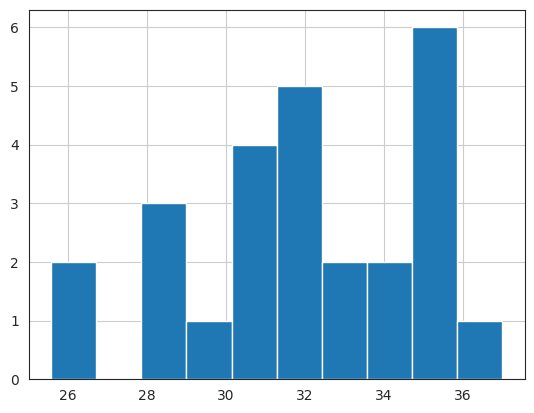

In [40]:
# assign matched labels to subjects table and all data table
#load the data that was matched sucessfully

matchedData=pd.read_csv('./inputData/matched_data_final.csv') #this table includes the single matches from pymatch

subjectsCleaned["matched"]=0
#subjectsCleaned.head()
subjectsCleaned["matched"]=subjectsCleaned['subjectID'].isin(matchedData['subjectID']).astype(int)

subjectsCleaned["matched_groups"]=0
subjectsCleaned["matched_groups"][(subjectsCleaned["isLongi"]>0) & (subjectsCleaned['matched']>0) & (subjectsCleaned['scan_number']==1)]=1
subjectsCleaned["matched_groups"][subjectsCleaned["matched_groups"]==1].shape
subjectsCleaned["matched_groups"][(subjectsCleaned["isLongi"]>0) & (subjectsCleaned['matched']>0) & (subjectsCleaned['scan_number']==2)]=2
subjectsCleaned["matched_groups"][subjectsCleaned["matched_groups"]==2].shape
subjectsCleaned["matched_groups"][(subjectsCleaned["isLongi"]==0) & (subjectsCleaned['matched']>0)]=3
subjectsCleaned["matched_groups"][subjectsCleaned["matched_groups"]==3].shape
#subjectsCleaned.head()

subjectsCleaned[subjectsCleaned['matched_groups']==0].shape
subjectsCleaned[subjectsCleaned['matched_groups']==1].shape
subjectsCleaned[subjectsCleaned['matched_groups']==2].shape
subjectsCleaned[subjectsCleaned['matched_groups']==3].shape

subjectsCleanedMatched=subjectsCleaned[subjectsCleaned['matched_groups']>0]
age0=subjectsCleaned[subjectsCleaned['matched_groups']==1]
age0['scan_age'].mean()
min0 = age0['scan_age'].min()
print(min0)
max0 = age0['scan_age'].max()
print(max0)
range0 = max0 - min0
print(range0)
statistics.stdev(age0['scan_age'])
age0.shape
age1=subjectsCleaned[subjectsCleaned['matched_groups']==2]
age1['scan_age'].mean()
min1 = age1['scan_age'].min()
print(min1)
max1 = age1['scan_age'].max()
print(max1)
range1 = max1 - min1
print(range1)
statistics.stdev(age1['scan_age'])
age1.shape

age2=subjectsCleaned[subjectsCleaned['matched_groups']==3]
age2['scan_age'].mean()
min2 = age2['scan_age'].min()
print(min2)
max2 = age2['scan_age'].max()
print(max2)
range2 = max2 - min2
print(range2)
statistics.stdev(age2['scan_age'])
age2.shape

age2=subjectsCleaned[subjectsCleaned['matched_groups']==3]
age2['birth_age'].mean()
min2 = age2['birth_age'].min()
print(min2)
max2 = age2['birth_age'].max()
print(max2)
range2 = max2 - min2
print(range2)
statistics.stdev(age2['birth_age'])
age2.shape

age0['birth_age'].hist()

age3=subjectsCleaned[subjectsCleaned['matched_groups']==1]
age3['birth_age'].mean()
age3.shape
age4=subjectsCleaned[subjectsCleaned['matched_groups']==2]
age4['birth_age'].mean()
age4.shape
age5=subjectsCleaned[subjectsCleaned['matched_groups']==3]
age5['birth_age'].mean()
age5.shape

allDataMergedCleaned=pd.merge(tract_profilesCleaned,subjectsCleaned,on=['subjectID','sessionID'])
#allDataMergedCleaned.head(20)
allDataMerged.shape
allDataCleaned.shape
allDataMergedCleaned.shape

allDataMergedCleaned[allDataMergedCleaned['matched_groups']==0].shape
allDataMergedCleaned[allDataMergedCleaned['matched_groups']==1].shape
allDataMergedCleaned[allDataMergedCleaned['matched_groups']==2].shape
allDataMergedCleaned[allDataMergedCleaned['matched_groups']==3].shape

allDataMergedCleaned.head()

In [41]:
#Load data
endpoint_profiles_Longi = pd.read_csv("./inputData/endpoint_profiles_Longi.csv", index_col=None)

# Combine both hemispheres
endpoint_profiles_Longi['t1t2w_GM'] = endpoint_profiles_Longi[['t1wt2wValues_LH', 't1wt2wValues_RH']].sum(axis=1, skipna=True)

# Compute weighted average T1w/T2w per subject/session/tract
WeightedAverageT1T2wSurfaceLongi = (
    endpoint_profiles_Longi
    .groupby(['subjectID', 'sessionID', 'tractID'], as_index=False)
    .apply(lambda x: pd.Series({
        'WeAvGMT1wT2w': np.average(x['t1t2w_GM'], weights=x['endpointdensity'])
    }))
    .reset_index(drop=True)
)

# Result
WeightedAverageT1T2wSurfaceLongi

,subjectID,sessionID,tractID,WeAvGMT1wT2w
0,CC00135AN12,44900,AFL,0.963060
1,CC00135AN12,44900,AFR,1.054980
2,CC00135AN12,44900,ATRL,0.970078
3,CC00135AN12,44900,ATRR,1.031863
4,CC00135AN12,44900,CCL,1.030466
...,...,...,...,...
1659,CC00845BN21,32110,UNCR,1.108773
1660,CC00845BN21,32110,VOFL,1.119439
1661,CC00845BN21,32110,VOFR,1.140267
1662,CC00845BN21,32110,pARCL,1.051696


In [42]:
#Merge dataframe for tract profiles and endpoint profiles (mean of nodes)
LongiWeightedGM = pd.merge(subjectsCleaned[['subjectID', 'sessionID', 'session_index', 'scan_age', 'birth_age']], WeightedAverageT1T2wSurfaceLongi, on=['sessionID', 'subjectID'])
LongiWeightedGM

LongiWeightedGMWM = pd.merge(LongiWeightedGM,TractProfilesMeanCut[['t1wt2w', 'subjectID','sessionID', 'tractID']],on=['subjectID','sessionID', 'tractID'])
LongiWeightedGMWM

,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w
0,CC00576XX16,163200,0,35.857143,28.857143,AFL,0.907255
1,CC00576XX16,163200,0,35.857143,28.857143,AFR,0.952050
2,CC00576XX16,163200,0,35.857143,28.857143,ATRL,0.975961
3,CC00576XX16,163200,0,35.857143,28.857143,ATRR,0.990975
4,CC00576XX16,163200,0,35.857143,28.857143,CCL,0.949348
...,...,...,...,...,...,...,...
1347,CC00191XX11,79600,1,40.428571,32.714286,UNCR,1.062476
1348,CC00191XX11,79600,1,40.428571,32.714286,VOFL,1.007222
1349,CC00191XX11,79600,1,40.428571,32.714286,VOFR,1.079313
1350,CC00191XX11,79600,1,40.428571,32.714286,pARCL,0.967715


,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w,t1wt2w
0,CC00576XX16,163200,0,35.857143,28.857143,AFL,0.907255,0.564740
1,CC00576XX16,163200,0,35.857143,28.857143,AFR,0.952050,0.589118
2,CC00576XX16,163200,0,35.857143,28.857143,ATRL,0.975961,0.714446
3,CC00576XX16,163200,0,35.857143,28.857143,ATRR,0.990975,0.721688
4,CC00576XX16,163200,0,35.857143,28.857143,CCL,0.949348,0.580182
...,...,...,...,...,...,...,...,...
1347,CC00191XX11,79600,1,40.428571,32.714286,UNCR,1.062476,0.691928
1348,CC00191XX11,79600,1,40.428571,32.714286,VOFL,1.007222,0.484579
1349,CC00191XX11,79600,1,40.428571,32.714286,VOFR,1.079313,0.492610
1350,CC00191XX11,79600,1,40.428571,32.714286,pARCL,0.967715,0.439560


## Matched preterms at birth

In [43]:
PretermMatched = pd.merge(age0[['subjectID', 'sessionID', 'session_index']], LongiWeightedGMWM, on=['subjectID', 'sessionID', 'session_index'])
PretermMatched
PretermMatchedMean = PretermMatched.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
PretermMatchedMean

# Summary statistics
mean_gm = PretermMatchedMean['WeAvGMT1wT2w'].mean()
std_gm = statistics.stdev(PretermMatchedMean['WeAvGMT1wT2w'])

mean_wm = PretermMatchedMean['t1wt2w'].mean()
std_wm = statistics.stdev(PretermMatchedMean['t1wt2w'])

# Output
print(f"GM Mean: {mean_gm:.4f}, Std Dev: {std_gm:.4f}")
print(f"WM Mean: {mean_wm:.4f}, Std Dev: {std_wm:.4f}")

,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w,t1wt2w
0,CC00576XX16,163200,0,35.857143,28.857143,AFL,0.907255,0.564740
1,CC00576XX16,163200,0,35.857143,28.857143,AFR,0.952050,0.589118
2,CC00576XX16,163200,0,35.857143,28.857143,ATRL,0.975961,0.714446
3,CC00576XX16,163200,0,35.857143,28.857143,ATRR,0.990975,0.721688
4,CC00576XX16,163200,0,35.857143,28.857143,CCL,0.949348,0.580182
...,...,...,...,...,...,...,...,...
671,CC00191XX11,65200,0,34.714286,32.714286,UNCR,1.093177,0.542982
672,CC00191XX11,65200,0,34.714286,32.714286,VOFL,1.043507,0.423347
673,CC00191XX11,65200,0,34.714286,32.714286,VOFR,1.045004,0.389172
674,CC00191XX11,65200,0,34.714286,32.714286,pARCL,0.945608,0.428805


,tractID,sessionID,session_index,scan_age,birth_age,WeAvGMT1wT2w,t1wt2w
0,AFL,116352.153846,0.0,34.32967,32.043956,0.984369,0.542530
1,AFR,116352.153846,0.0,34.32967,32.043956,1.043867,0.547180
2,ATRL,116352.153846,0.0,34.32967,32.043956,1.012444,0.774692
3,ATRR,116352.153846,0.0,34.32967,32.043956,1.060519,0.778876
4,CCL,116352.153846,0.0,34.32967,32.043956,1.049759,0.606469
5,CCR,116352.153846,0.0,34.32967,32.043956,1.038878,0.598877
6,CSL,116352.153846,0.0,34.32967,32.043956,1.086001,0.926088
7,CSR,116352.153846,0.0,34.32967,32.043956,1.118658,0.923183
8,FcMa,116352.153846,0.0,34.32967,32.043956,1.028241,0.598821
9,FcMi,116352.153846,0.0,34.32967,32.043956,1.042628,0.511609


GM Mean: 1.0266, Std Dev: 0.0430
WM Mean: 0.5779, Std Dev: 0.1386


In [44]:
PretermAtFullterm = pd.merge(age1[['subjectID', 'sessionID', 'session_index']], LongiWeightedGMWM, on=['subjectID', 'sessionID', 'session_index'])
PretermAtFullterm
PretermAtFulltermMean = PretermAtFullterm.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
PretermAtFulltermMean

# Summary statistics
mean_gm = PretermAtFulltermMean['WeAvGMT1wT2w'].mean()
std_gm = statistics.stdev(PretermAtFulltermMean['WeAvGMT1wT2w'])

mean_wm = PretermAtFulltermMean['t1wt2w'].mean()
std_wm = statistics.stdev(PretermAtFulltermMean['t1wt2w'])

# Output
print(f"GM Mean: {mean_gm:.4f}, Std Dev: {std_gm:.4f}")
print(f"WM Mean: {mean_wm:.4f}, Std Dev: {std_wm:.4f}")

,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w,t1wt2w
0,CC00576XX16,178200,1,42.142857,28.857143,AFL,1.085238,0.545361
1,CC00576XX16,178200,1,42.142857,28.857143,AFR,1.136934,0.564323
2,CC00576XX16,178200,1,42.142857,28.857143,ATRL,1.048770,0.890493
3,CC00576XX16,178200,1,42.142857,28.857143,ATRR,1.076089,0.962870
4,CC00576XX16,178200,1,42.142857,28.857143,CCL,1.156337,0.636431
...,...,...,...,...,...,...,...,...
671,CC00191XX11,79600,1,40.428571,32.714286,UNCR,1.062476,0.691928
672,CC00191XX11,79600,1,40.428571,32.714286,VOFL,1.007222,0.484579
673,CC00191XX11,79600,1,40.428571,32.714286,VOFR,1.079313,0.492610
674,CC00191XX11,79600,1,40.428571,32.714286,pARCL,0.967715,0.439560


,tractID,sessionID,session_index,scan_age,birth_age,WeAvGMT1wT2w,t1wt2w
0,AFL,118486.615385,1.0,40.703297,32.043956,1.089389,0.631222
1,AFR,118486.615385,1.0,40.703297,32.043956,1.128139,0.614096
2,ATRL,118486.615385,1.0,40.703297,32.043956,1.047797,0.921365
3,ATRR,118486.615385,1.0,40.703297,32.043956,1.076379,0.907634
4,CCL,118486.615385,1.0,40.703297,32.043956,1.123279,0.641495
5,CCR,118486.615385,1.0,40.703297,32.043956,1.101844,0.661737
6,CSL,118486.615385,1.0,40.703297,32.043956,1.252611,1.310452
7,CSR,118486.615385,1.0,40.703297,32.043956,1.257388,1.249834
8,FcMa,118486.615385,1.0,40.703297,32.043956,1.066140,0.689955
9,FcMi,118486.615385,1.0,40.703297,32.043956,1.062476,0.571402


GM Mean: 1.0936, Std Dev: 0.0650
WM Mean: 0.6950, Std Dev: 0.2102


In [45]:
MatchedFullTerms = pd.merge(age2[['subjectID', 'sessionID']], T1wT2wBothWeAve, on=['subjectID', 'sessionID'])
MatchedFullTerms
MatchedFullTermsMean = MatchedFullTerms.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
MatchedFullTermsMean

# Summary statistics
mean_gm = MatchedFullTermsMean['WeAvGMT1wT2w'].mean()
std_gm = statistics.stdev(MatchedFullTermsMean['WeAvGMT1wT2w'])

mean_wm = MatchedFullTermsMean['t1wt2w'].mean()
std_wm = statistics.stdev(MatchedFullTermsMean['t1wt2w'])

# Output
print(f"GM Mean: {mean_gm:.4f}, Std Dev: {std_gm:.4f}")
print(f"WM Mean: {mean_wm:.4f}, Std Dev: {std_wm:.4f}")

,subjectID,sessionID,tractID,WeAvGMT1wT2w,t1wt2w
0,CC00484XX15,142700,AFL,1.468183,1.031570
1,CC00484XX15,142700,AFR,1.490462,1.037096
2,CC00484XX15,142700,ATRL,1.327689,1.330665
3,CC00484XX15,142700,ATRR,1.307145,1.258415
4,CC00484XX15,142700,CCL,1.416259,0.972800
...,...,...,...,...,...
645,CC00740XX15,238400,UNCR,1.393651,0.891092
646,CC00740XX15,238400,VOFL,1.222156,0.563134
647,CC00740XX15,238400,VOFR,1.298959,0.627953
648,CC00740XX15,238400,pARCL,1.092645,0.571332


,tractID,sessionID,WeAvGMT1wT2w,t1wt2w
0,AFL,106713.08,1.236487,0.840034
1,AFR,106713.08,1.291919,0.821906
2,ATRL,106713.08,1.204826,1.143281
3,ATRR,106713.08,1.224434,1.131021
4,CCL,106713.08,1.294491,0.808216
5,CCR,106713.08,1.258303,0.809327
6,CSL,106713.08,1.443869,1.600916
7,CSR,106713.08,1.463237,1.581802
8,FcMa,106713.08,1.231016,0.844436
9,FcMi,106713.08,1.211010,0.724409


GM Mean: 1.2634, Std Dev: 0.0833
WM Mean: 0.8717, Std Dev: 0.2533


In [47]:
# Common tract names for all groups (assumes same order across all DataFrames)
tracts = ['AF', 'AF', 'ATR', 'ATR', 'CC', 'CC', 'CS', 'CS', 'FcMa', 'FcMi', 
          'IFOF', 'IFOF', 'ILF', 'ILF', 'MLF', 'MLF', 'OR', 'OR', 'SLF', 'SLF', 
          'UNC', 'UNC', 'VOF', 'VOF', 'pARC', 'pARC']

# Define function to compute left-right GM difference
def compute_hemisphere_diff(df, label):
    df = df.copy()
    df['tract'] = tracts
    df = df.sort_values(by=['tract', 'tractID'])
    df['diffGM'] = df.groupby('tract')['WeAvGMT1wT2w'].diff().fillna(0)
    mean_diff = df['diffGM'].mean()
    return df, mean_diff

# Compute average per tractID
PretermMatchedAve, _ = compute_hemisphere_diff(
    PretermMatched.groupby('tractID', as_index=False).mean(numeric_only=True), 
    'PretermMatched'
)

PretermAtFulltermAve, _ = compute_hemisphere_diff(
    PretermAtFullterm.groupby('tractID', as_index=False).mean(numeric_only=True), 
    'PretermAtFullterm'
)

MatchedFullTermsAve, _ = compute_hemisphere_diff(
    MatchedFullTerms.groupby('tractID', as_index=False).mean(numeric_only=True), 
    'MatchedFullTerms'
)

# Run t-tests
def run_ttest(df1, df2, label1, label2):
    t, p = stats.ttest_ind(df1['diffGM'], df2['diffGM'])
    print(f'Difference GM {label1} vs. {label2} t = {t:.4f}, p = {p:.4g}')

run_ttest(PretermMatchedAve, PretermAtFulltermAve, 'Premies at Birth', 'Premies at Fullterm')
run_ttest(PretermMatchedAve, MatchedFullTermsAve, 'Premies at Birth', 'Fullterm')
run_ttest(PretermAtFulltermAve, MatchedFullTermsAve, 'Premies at Fullterm', 'Fullterm')

Difference GM Premies at Birth vs. Premies at Fullterm t = 1.2028, p = 0.2347
Difference GM Premies at Birth vs. Fullterm t = 0.1347, p = 0.8934
Difference GM Premies at Fullterm vs. Fullterm t = -0.9204, p = 0.3618


## Figure 2

In [ ]:
#this generates fig 2A in the main manuscript
#now we are looking at the mean T1w/T2w across subjects
#here we create a simple plot of comparing T1w/T2w of white matter and T1w/T2w of corresponding cortical targets

sns.set_style('white');
fig1=sns.lmplot(
    data=AveSubT1wT2wBothWeAve, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", scatter_kws={"s": 350}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=AveSubT1wT2wBothWeAve, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(AveSubT1wT2wBothWeAve['WeAvGMT1wT2w'], AveSubT1wT2wBothWeAve['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Mean Across Subjects', fontsize=50)

os.makedirs('./figures',exist_ok=True)
plt.savefig('./figures/MyelinGMvsMyelinWM.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.8241467736669305, pvalue=2.2816274134454748e-07)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(28.875000000000007, 0.5, 'T1w/T2w in WM')

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.4000000000000001, '1.4'),
  Text(0, 1.6, '1.6'),
  Text(0, 1.8, '1.8')])

(array([1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 [Text(1.05, 0, '1.05'),
  Text(1.1, 0, '1.10'),
  Text(1.1500000000000001, 0, '1.15'),
  Text(1.2000000000000002, 0, '1.20'),
  Text(1.25, 0, '1.25'),
  Text(1.3, 0, '1.30'),
  Text(1.35, 0, '1.35'),
  Text(1.4000000000000001, 0, '1.40'),
  Text(1.4500000000000002, 0, '1.45'),
  Text(1.5, 0, '1.50')])

Text(0.5, 1.0, 'High Correlation')

PearsonRResult(statistic=0.5596585317591304, pvalue=0.0029507040262460467)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(28.875000000000007, 0.5, 'T1w/T2w in WM')

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 [Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.4, '1.4'),
  Text(0, 1.6, '1.6'),
  Text(0, 1.8000000000000003, '1.8')])

(array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]),
 [Text(1.1, 0, '1.1'),
  Text(1.2000000000000002, 0, '1.2'),
  Text(1.3, 0, '1.3'),
  Text(1.4000000000000001, 0, '1.4'),
  Text(1.5, 0, '1.5'),
  Text(1.6, 0, '1.6'),
  Text(1.7000000000000002, 0, '1.7')])

Text(0.5, 1.0, 'Intermediate Correlation')

PearsonRResult(statistic=0.13211901348945387, pvalue=0.5199807343486165)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.000000000000007, 0.5, 'T1w/T2w in WM')

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9'),
  Text(0, 1.0, '1.0')])

(array([0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  , 1.125, 1.15 , 1.175,
        1.2  ]),
 [Text(0.9750000000000001, 0, '0.975'),
  Text(1.0, 0, '1.000'),
  Text(1.0250000000000001, 0, '1.025'),
  Text(1.05, 0, '1.050'),
  Text(1.0750000000000002, 0, '1.075'),
  Text(1.1, 0, '1.100'),
  Text(1.125, 0, '1.125'),
  Text(1.1500000000000001, 0, '1.150'),
  Text(1.175, 0, '1.175'),
  Text(1.2000000000000002, 0, '1.200')])

Text(0.5, 1.0, 'Low Correlation')

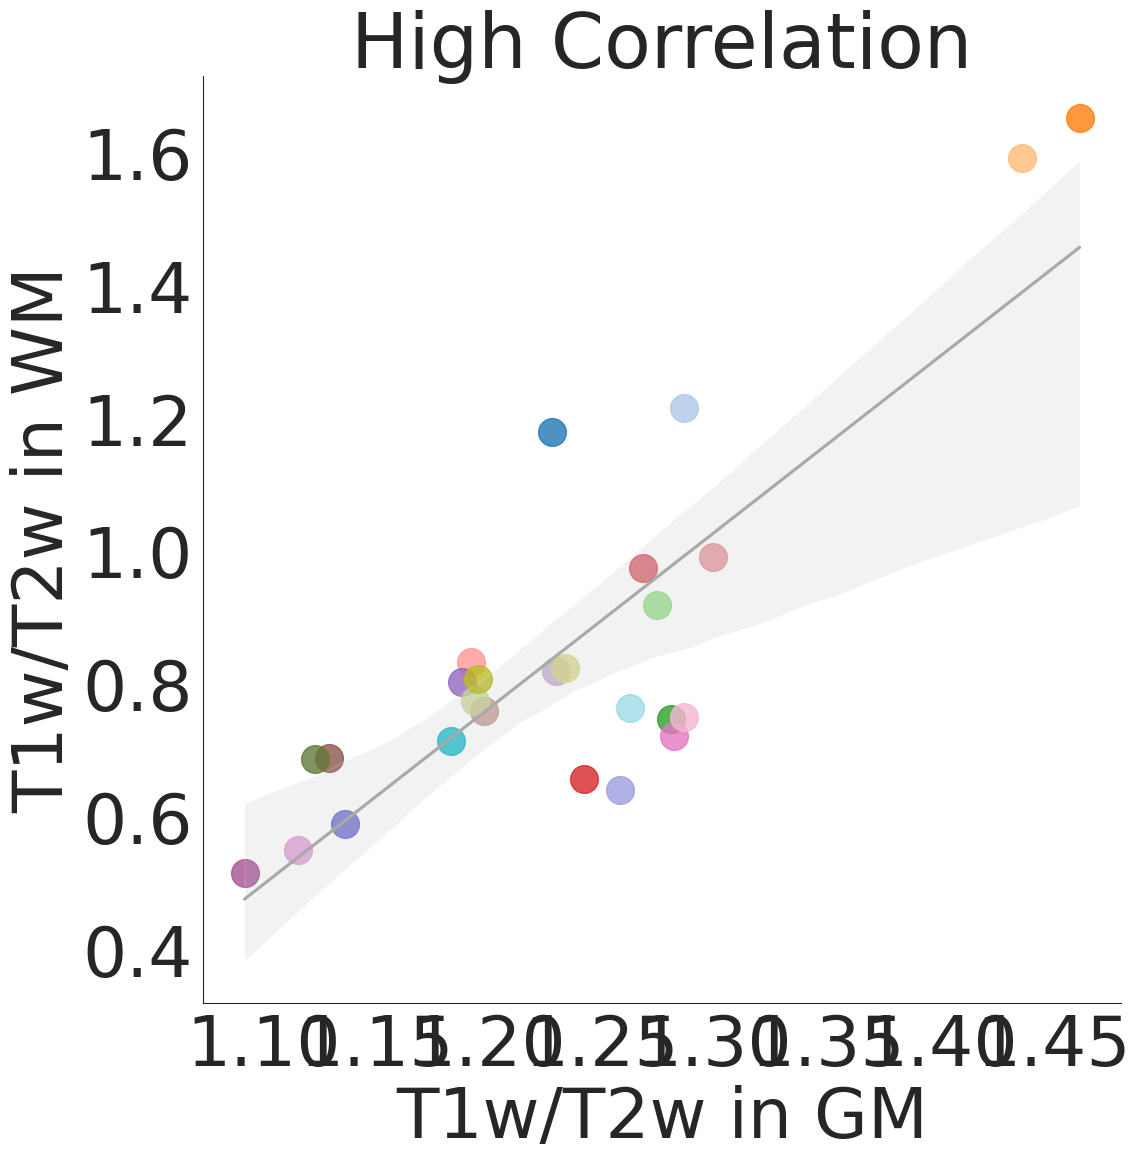

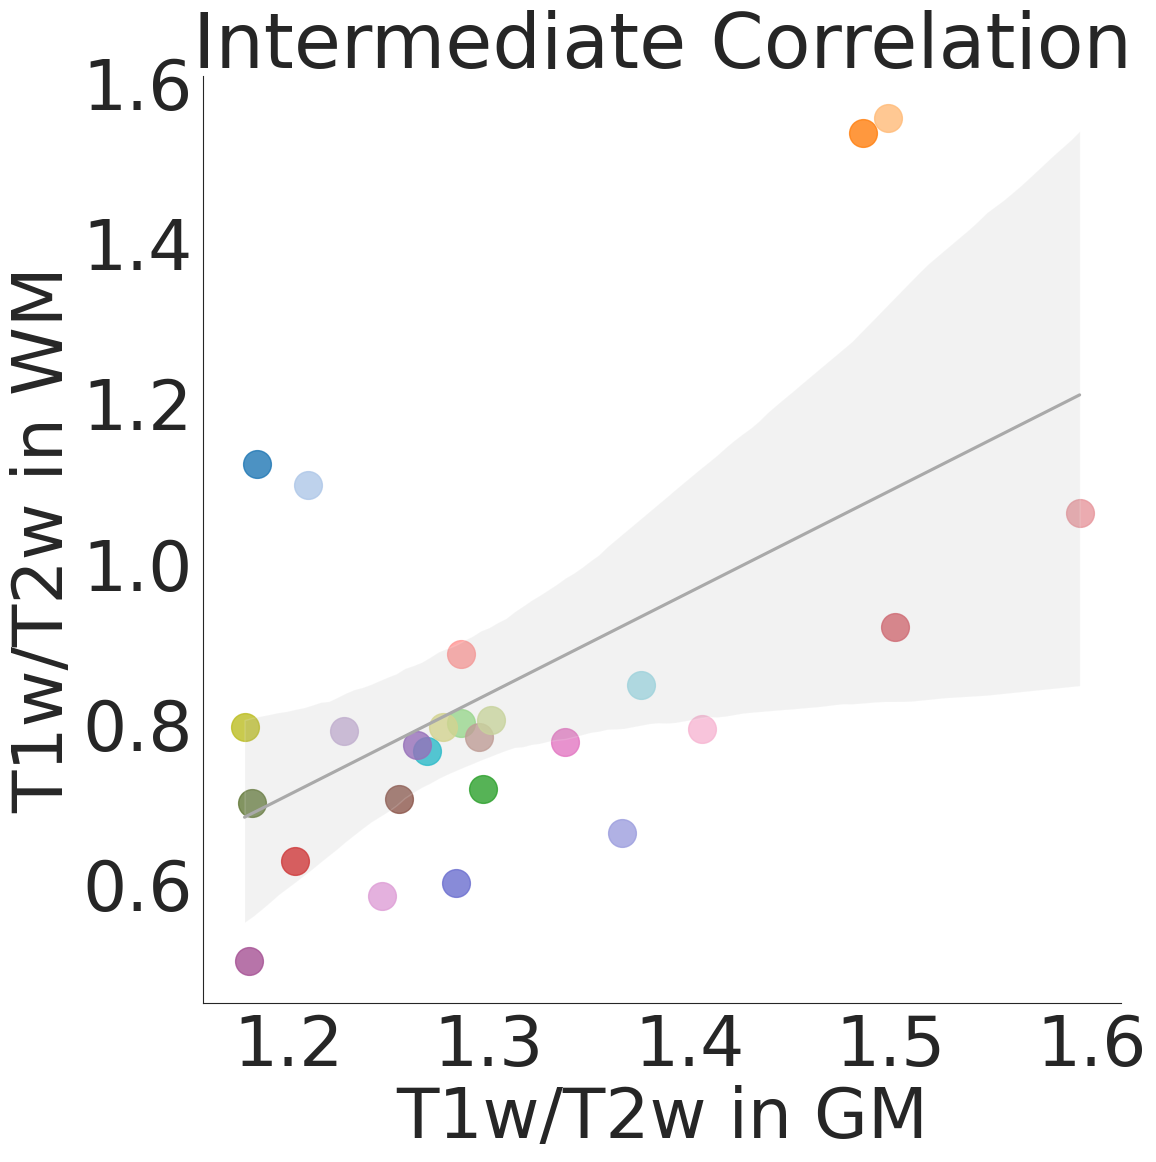

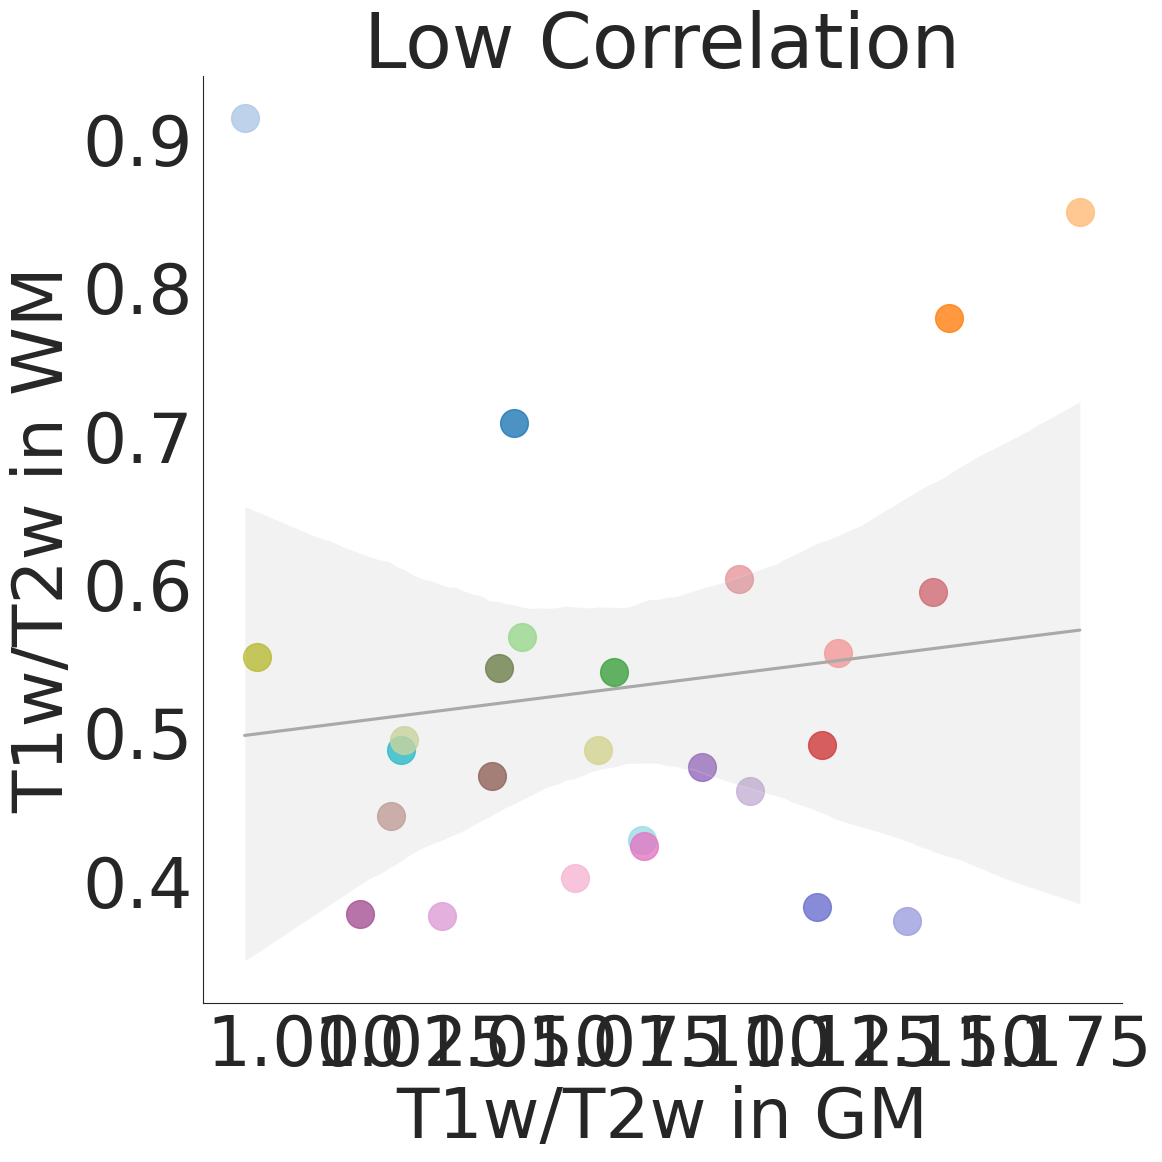

In [234]:
#Plot three example subjects

#Highest r²
DataSub1=T1wT2wBothWeAve[(T1wT2wBothWeAve['subjectID']=='CC00457XX12') & (T1wT2wBothWeAve['sessionID']==138601)]
sns.set_style('white');
fig1=sns.lmplot(
    data=DataSub1, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", scatter_kws={"s": 400}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=DataSub1, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(DataSub1['WeAvGMT1wT2w'], DataSub1['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
fig1.set_title('High Correlation', fontsize=55)
plt.savefig('./figures/MyelinGMvsMyelinWM_HighCorr.png', dpi=600, bbox_inches = "tight")

#Intermediate r²
DataSub2=T1wT2wBothWeAve[(T1wT2wBothWeAve['subjectID']=='CC00066XX09')]
sns.set_style('white');
fig1=sns.lmplot(
    data=DataSub2, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", scatter_kws={"s": 400}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=DataSub2, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(DataSub2['WeAvGMT1wT2w'], DataSub2['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
fig1.set_title('Intermediate Correlation', fontsize=55)
plt.savefig('./figures/MyelinGMvsMyelinWM_MidCorr.png', dpi=600, bbox_inches = "tight")


#Lowest r²
DataSub3=T1wT2wBothWeAve[(T1wT2wBothWeAve['subjectID']=='CC00723XX14')]
sns.set_style('white');
fig1=sns.lmplot(
    data=DataSub3, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", scatter_kws={"s": 400}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=DataSub3, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(DataSub3['WeAvGMT1wT2w'], DataSub3['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
fig1.set_title('Low Correlation', fontsize=55)
plt.savefig('./figures/MyelinGMvsMyelinWM_LowCorr.png', dpi=600, bbox_inches = "tight")

## Figure 3

In [215]:
BehavDataAllScoresR2s['bsid_mot_sumscaled'] = BehavDataAllScoresR2s['bsid_mot_sumscaled'].astype(int)

# Specify the column for which to remove outliers
column = 'bsid_mot_sumscaled'

# Calculate mean and standard deviation
mean = BehavDataAllScoresR2s[column].mean()
std = BehavDataAllScoresR2s[column].std()

# Define upper and lower bounds for non-outliers
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Filter the dataframe to remove outliers
BehavDataAllScoresR2s_cleaned = BehavDataAllScoresR2s[(BehavDataAllScoresR2s[column] >= lower_bound)] #& (BehavDataAllScoresR2s[column] <= upper_bound)]
BehavDataAllScoresR2s_deleted = BehavDataAllScoresR2s[(BehavDataAllScoresR2s[column] < lower_bound)] #| (BehavDataAllScoresR2s[column] > upper_bound)]

BehavDataAllScoresR2s_deleted
BehavDataAllScoresR2s_cleaned

,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
33,CC00152AN04,4,3,4,24.0,1.018178,0.592194,0.447747,0.000186
40,CC00174XX10,13,16,8,18.0,1.196916,0.821909,0.401783,0.000507
81,CC00314XX09,11,9,4,19.0,1.276590,0.793906,0.432850,0.000259
111,CC00415XX11,10,8,7,19.0,1.254718,0.899978,0.255748,0.008398
120,CC00439XX19,13,12,4,18.0,1.365384,1.045381,0.434866,0.000248
135,CC00483XX14,13,9,4,18.0,1.400583,0.985939,0.341655,0.001714
140,CC00498XX21,12,17,8,19.0,1.169756,0.792861,0.392486,0.000617
157,CC00552XX08,12,18,10,19.0,1.198839,0.786342,0.569293,0.000008
204,CC00815XX15,12,24,10,19.0,1.211753,0.841889,0.316337,0.002783
209,CC00843XX19,12,18,7,18.0,1.202705,0.770402,0.450800,0.000173


,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
0,CC00060XX03,16,11,8,19.0,1.253620,0.849098,0.523879,0.000029
1,CC00063AN06,25,22,11,19.0,1.114477,0.611412,0.508191,0.000044
2,CC00065XX08,20,19,12,18.0,1.284727,0.832711,0.277790,0.005665
3,CC00066XX09,22,22,9,18.0,1.307459,0.847321,0.313218,0.002951
4,CC00067XX10,19,13,8,18.0,1.155027,0.725021,0.372938,0.000921
...,...,...,...,...,...,...,...,...,...
210,CC00845AN21,20,19,13,20.0,1.082344,0.683652,0.383540,0.000742
211,CC00845BN21,20,20,14,20.0,1.117321,0.715423,0.356974,0.001269
212,CC00852XX11,16,20,8,20.0,1.342871,0.978292,0.466654,0.000120
213,CC00879XX22,20,26,10,18.0,1.248763,0.834134,0.565069,0.000010


PearsonRResult(statistic=0.1696381099185686, pvalue=0.01503036355738203)

Text(0.5, 29.140624999999986, 'Motor Scores')

Text(29.000000000000007, 0.5, 'T1w/T2w correlation [$\\mathregular{r^{2}}$]')

(array([12., 14., 16., 18., 20., 22., 24., 26., 28., 30.]),
 [Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20'),
  Text(22.0, 0, '22'),
  Text(24.0, 0, '24'),
  Text(26.0, 0, '26'),
  Text(28.0, 0, '28'),
  Text(30.0, 0, '30')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Motor Subscale')

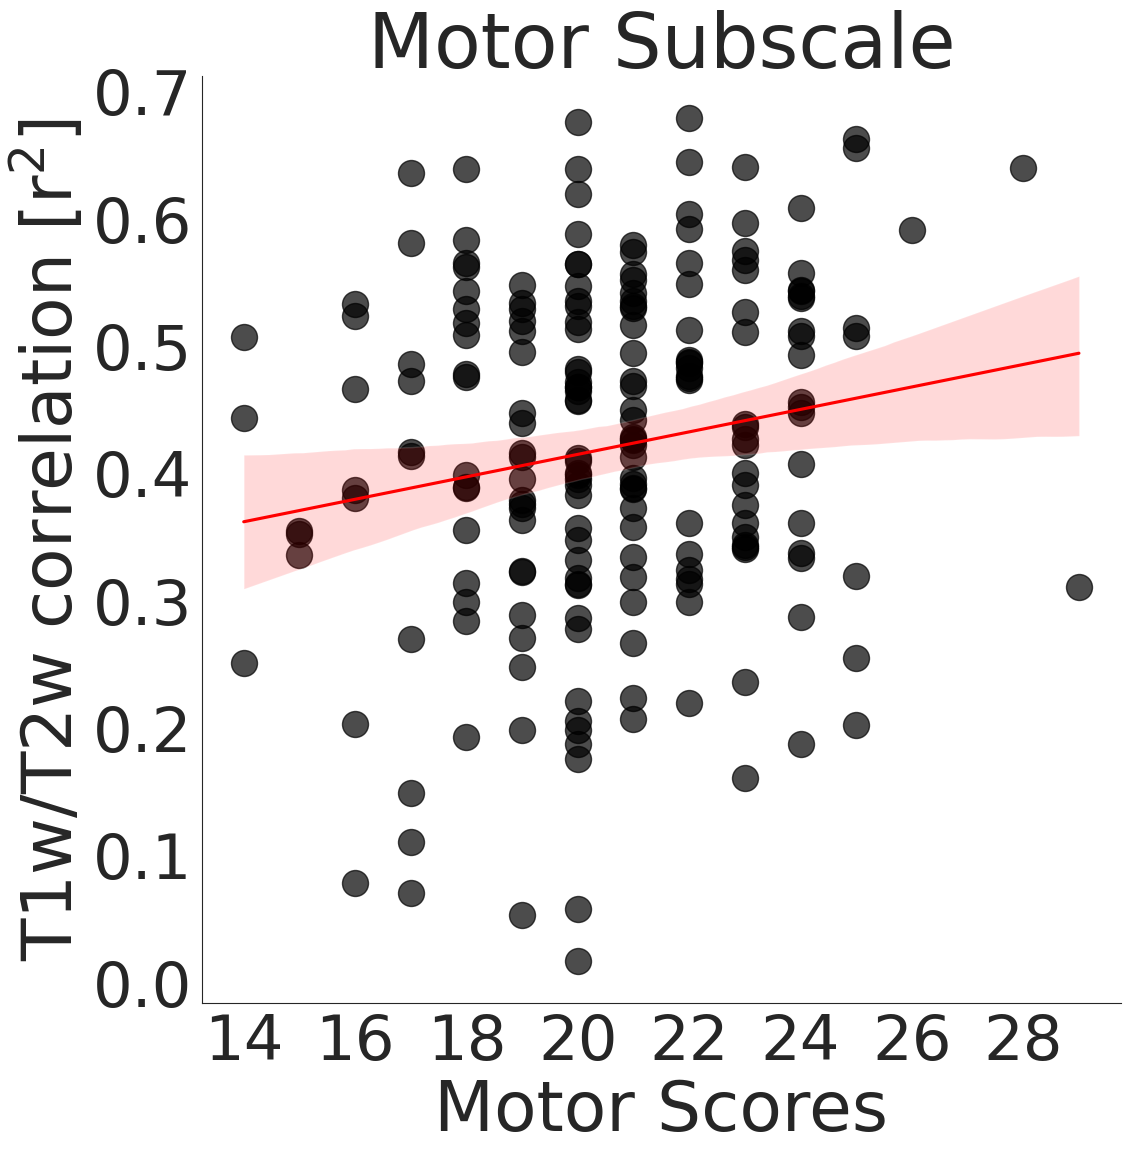

In [217]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleaned, x='bsid_mot_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleaned, x='bsid_mot_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleaned['bsid_mot_sumscaled'], BehavDataAllScoresR2s_cleaned['r2'])
#stats.spearmanr(BehavDataAllScoresR2s['bsid_mot_sumscaled'], BehavDataAllScoresR2s['r2'])
plt.xlabel("Motor Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Motor Subscale', fontsize=55)

plt.savefig('./figures/r2_motor_cleaned.png', dpi=600, bbox_inches = "tight")

In [218]:
BehavDataAllScoresR2s['bsid_cog_sumscaled'] = BehavDataAllScoresR2s['bsid_cog_sumscaled'].astype(int)

# Specify the column for which to remove outliers
column = 'bsid_cog_sumscaled'

# Calculate mean and standard deviation
mean = BehavDataAllScoresR2s[column].mean()
std = BehavDataAllScoresR2s[column].std()

# Define upper and lower bounds for non-outliers
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Filter the dataframe to remove outliers
BehavDataAllScoresR2s_cleanedcognition = BehavDataAllScoresR2s[(BehavDataAllScoresR2s[column] >= lower_bound)] #& (BehavDataAllScoresR2s[column] <= upper_bound)]
BehavDataAllScoresR2s_deletedcognition = BehavDataAllScoresR2s[(BehavDataAllScoresR2s[column] < lower_bound)] #| (BehavDataAllScoresR2s[column] > upper_bound)]

BehavDataAllScoresR2s_deletedcognition
BehavDataAllScoresR2s_cleanedcognition

,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
33,CC00152AN04,4,3,4,24.0,1.018178,0.592194,0.447747,0.000186
35,CC00161XX05,15,7,5,21.0,1.012986,0.625268,0.355000,0.001319
49,CC00202XX04,17,14,5,19.0,1.285814,0.800398,0.581508,0.000006
81,CC00314XX09,11,9,4,19.0,1.276590,0.793906,0.432850,0.000259
120,CC00439XX19,13,12,4,18.0,1.365384,1.045381,0.434866,0.000248
135,CC00483XX14,13,9,4,18.0,1.400583,0.985939,0.341655,0.001714


,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
0,CC00060XX03,16,11,8,19.0,1.253620,0.849098,0.523879,0.000029
1,CC00063AN06,25,22,11,19.0,1.114477,0.611412,0.508191,0.000044
2,CC00065XX08,20,19,12,18.0,1.284727,0.832711,0.277790,0.005665
3,CC00066XX09,22,22,9,18.0,1.307459,0.847321,0.313218,0.002951
4,CC00067XX10,19,13,8,18.0,1.155027,0.725021,0.372938,0.000921
...,...,...,...,...,...,...,...,...,...
210,CC00845AN21,20,19,13,20.0,1.082344,0.683652,0.383540,0.000742
211,CC00845BN21,20,20,14,20.0,1.117321,0.715423,0.356974,0.001269
212,CC00852XX11,16,20,8,20.0,1.342871,0.978292,0.466654,0.000120
213,CC00879XX22,20,26,10,18.0,1.248763,0.834134,0.565069,0.000010


PearsonRResult(statistic=0.10142879454608296, pvalue=0.14392870053631976)

Text(0.5, 29.140624999999986, 'Cognition Scores')

Text(29.000000000000007, 0.5, 'T1w/T2w correlation [$\\mathregular{r^{2}}$]')

(array([ 4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Cognition Subscale')

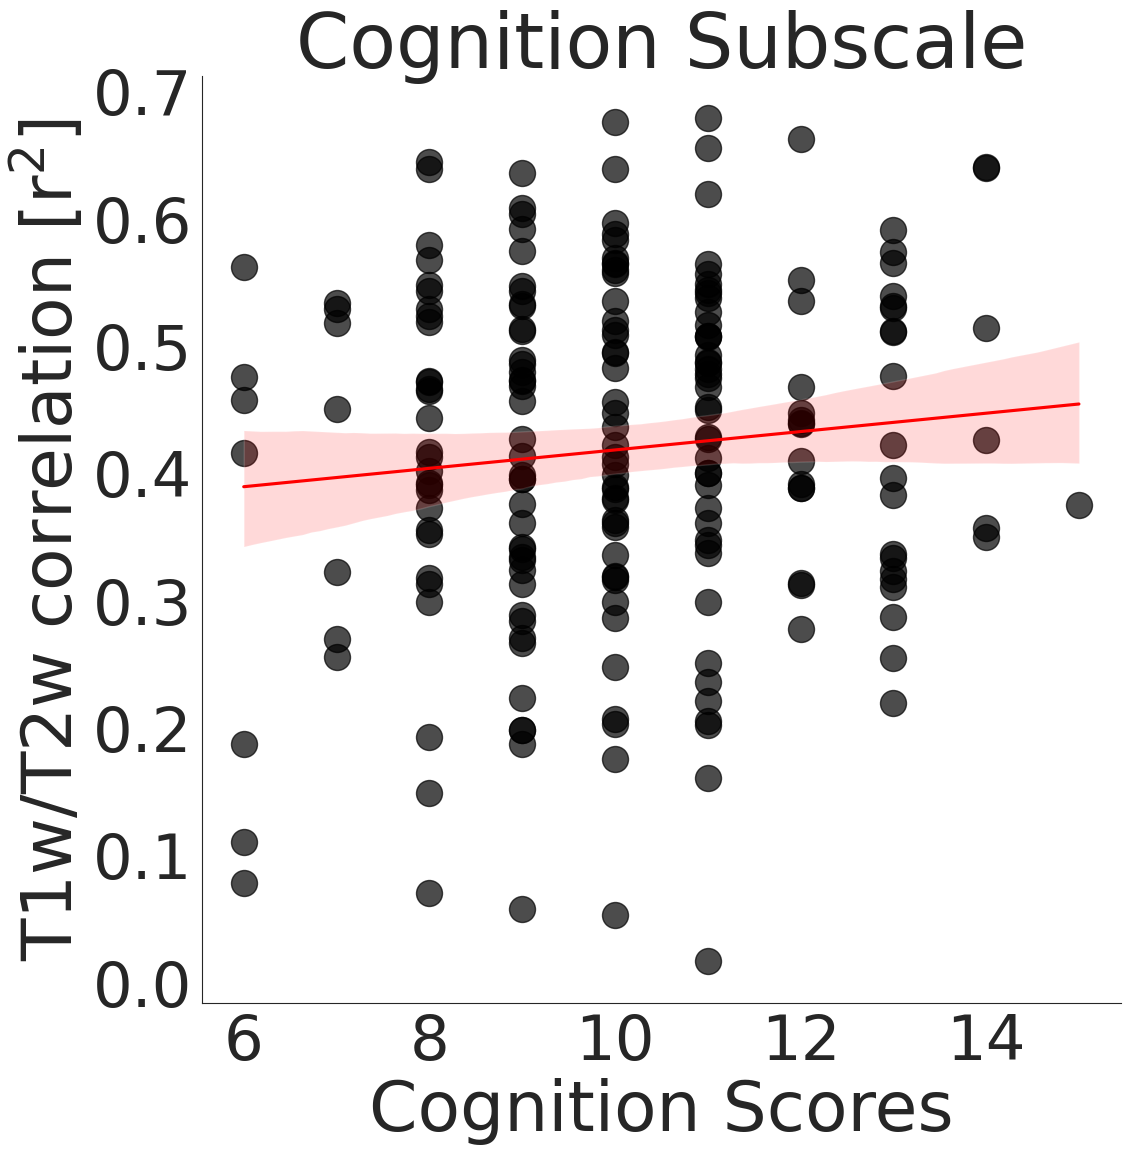

In [222]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleanedcognition, x='bsid_cog_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleanedcognition, x='bsid_cog_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleanedcognition['bsid_cog_sumscaled'], BehavDataAllScoresR2s_cleanedcognition['r2'])
#stats.spearmanr(BehavDataAllScoresR2s['bsid_mot_sumscaled'], BehavDataAllScoresR2s['r2'])
plt.xlabel("Cognition Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Cognition Subscale', fontsize=55)

plt.savefig('./figures/r2_cognition_cleaned.png', dpi=600, bbox_inches = "tight")

In [220]:
BehavDataAllScoresR2s['bsid_lang_sumscaled'] = BehavDataAllScoresR2s['bsid_lang_sumscaled'].astype(int)

# Specify the column for which to remove outliers
column = 'bsid_lang_sumscaled'

# Calculate mean and standard deviation
mean = BehavDataAllScoresR2s[column].mean()
std = BehavDataAllScoresR2s[column].std()

# Define upper and lower bounds for non-outliers
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Filter the dataframe to remove outliers
BehavDataAllScoresR2s_cleanedlanguage = BehavDataAllScoresR2s[(BehavDataAllScoresR2s[column] >= lower_bound)] #& (BehavDataAllScoresR2s[column] <= upper_bound)]
BehavDataAllScoresR2s_deletedlanguage = BehavDataAllScoresR2s[(BehavDataAllScoresR2s[column] < lower_bound)] #| (BehavDataAllScoresR2s[column] > upper_bound)]

BehavDataAllScoresR2s_deletedlanguage
BehavDataAllScoresR2s_cleanedlanguage

,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
28,CC00138XX15,24,4,11,19.0,1.388616,0.958085,0.508339,0.000044
33,CC00152AN04,4,3,4,24.0,1.018178,0.592194,0.447747,0.000186
35,CC00161XX05,15,7,5,21.0,1.012986,0.625268,0.355000,0.001319
56,CC00218BN12,18,7,6,21.0,1.019114,0.664371,0.476133,0.000096
207,CC00829XX21,17,7,8,20.0,1.124515,0.497259,0.149074,0.051389


,subjectID,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
0,CC00060XX03,16,11,8,19.0,1.253620,0.849098,0.523879,0.000029
1,CC00063AN06,25,22,11,19.0,1.114477,0.611412,0.508191,0.000044
2,CC00065XX08,20,19,12,18.0,1.284727,0.832711,0.277790,0.005665
3,CC00066XX09,22,22,9,18.0,1.307459,0.847321,0.313218,0.002951
4,CC00067XX10,19,13,8,18.0,1.155027,0.725021,0.372938,0.000921
...,...,...,...,...,...,...,...,...,...
210,CC00845AN21,20,19,13,20.0,1.082344,0.683652,0.383540,0.000742
211,CC00845BN21,20,20,14,20.0,1.117321,0.715423,0.356974,0.001269
212,CC00852XX11,16,20,8,20.0,1.342871,0.978292,0.466654,0.000120
213,CC00879XX22,20,26,10,18.0,1.248763,0.834134,0.565069,0.000010


PearsonRResult(statistic=0.10955252864629535, pvalue=0.1134535876232178)

Text(0.5, 29.140624999999986, 'Language Scores')

Text(29.000000000000007, 0.5, 'T1w/T2w correlation [$\\mathregular{r^{2}}$]')

(array([ 5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Language Subscale')

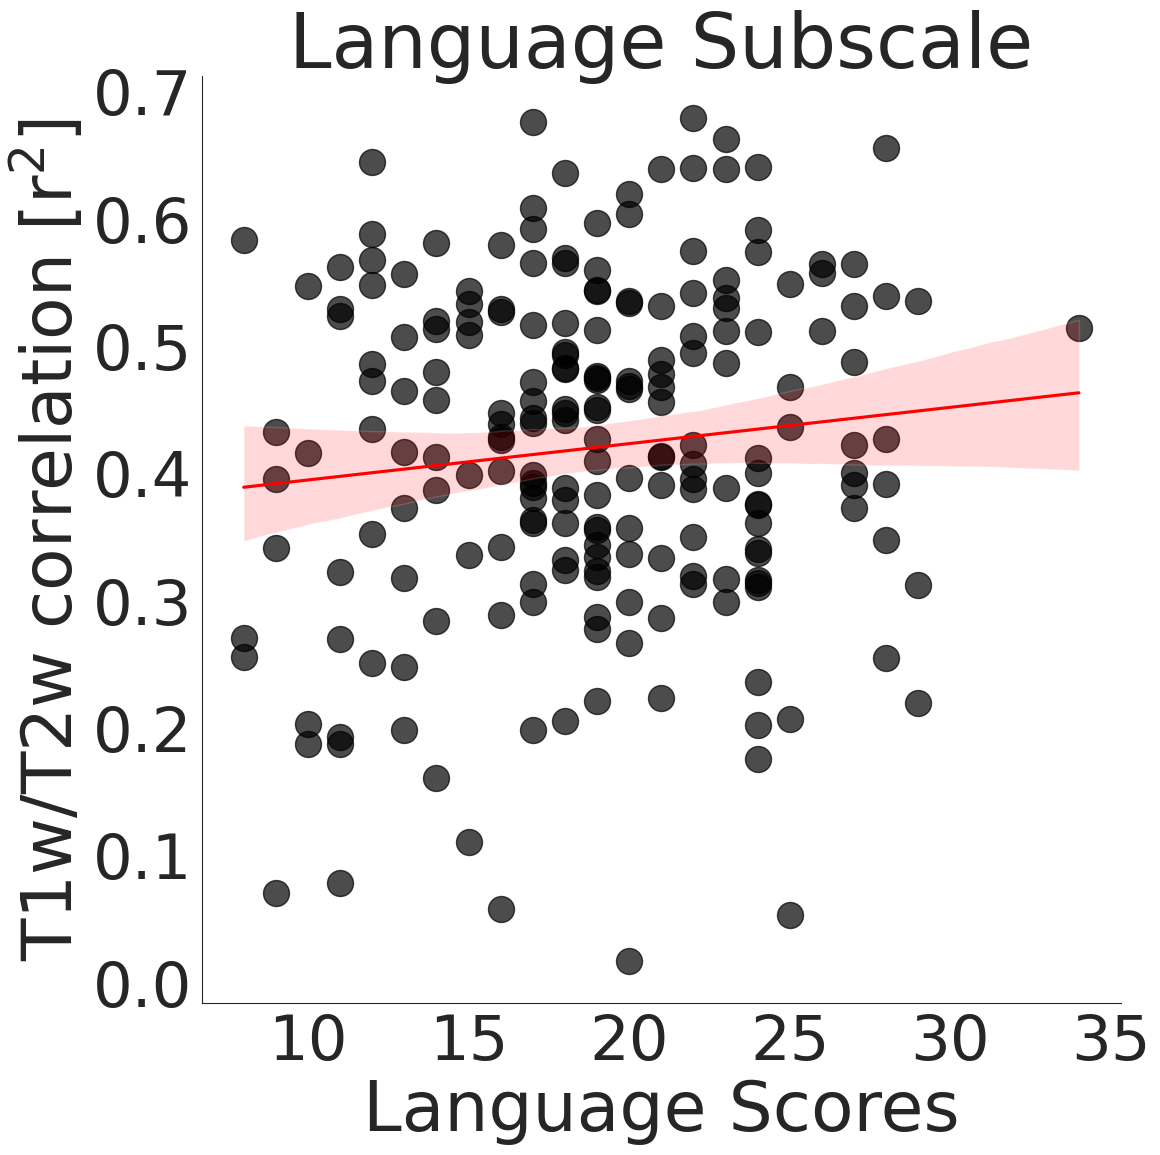

In [221]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleanedlanguage, x='bsid_lang_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleanedlanguage, x='bsid_lang_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleanedlanguage['bsid_lang_sumscaled'], BehavDataAllScoresR2s_cleanedlanguage['r2'])
#stats.spearmanr(BehavDataAllScoresR2s['bsid_mot_sumscaled'], BehavDataAllScoresR2s['r2'])
plt.xlabel("Language Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Language Subscale', fontsize=55)

plt.savefig('./figures/r2_language_cleaned.png', dpi=600, bbox_inches = "tight")

## Figure 4

In [ ]:
sns.set_style('white');
fig1=sns.lmplot(
    data=SlopeBoth, x='coeff_GM', y="coeff", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=SlopeBoth, x='coeff_GM', y="coeff", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(SlopeBoth['coeff_GM'], SlopeBoth['coeff'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1w/T2w Slope in GM", fontsize=50)
plt.ylabel("T1w/T2w Slope in WM", fontsize=50)
plt.xticks([0.02, 0.025, 0.03, 0.035, 0.04, 0.045], fontsize=35)
plt.yticks(fontsize=35)

plt.savefig('./figures/SlopeGMvsSlopeWM_AllInfants.png', dpi=600, bbox_inches = "tight")

In [ ]:
#plot correlation between T1w/T2w of gray matter against T1w/T2w of white  matter (across bundles)

data=[]
tract_info=[]

fig, axes = plt.subplots(4,4,frameon=False,figsize=(14,17));
fig.tight_layout;
fig.subplots_adjust(wspace=0.1, hspace=0.9);
sns.set(font_scale = 2);
sns.set_style('white');

ct = 0;
for bundle, color in zip(tracts, colors):
#for bundle in tracts:
    ax=axes[tractPosHorz[tracts[ct]]];
    _=ax.set_ylim([0.3,2.2])
    SlopeTract=SlopeAnalysesMeanBundles.query("Tract == @bundle");
    SlopeTractGM= SlopeTract.groupby(['subjectID', 'scan_age', 'Tract'], as_index=False, sort=False)['WeAvGMT1wT2w'].mean()
    SlopeTractWM = SlopeTract.groupby(['subjectID', 'scan_age','Tract'], as_index=False, sort=False)['t1wt2w'].mean()
    sns.set_style('white');
    
    ax=axes[tractPosHorz[tracts[ct]]];
    sns.set_style('white');
       
    fig1=sns.scatterplot(data=SlopeTractWM, x='scan_age', y='t1wt2w', hue='Tract', ax=ax, legend=False, palette=[color_list_chosen3[ct]], alpha=0.5)
    fig1=sns.regplot(data=SlopeTractWM, x='scan_age', y="t1wt2w", scatter=False, ax=ax, line_kws=dict(color=f'{color}', alpha=0.5))
    fig1=sns.scatterplot(data=SlopeTractGM, x='scan_age', y='WeAvGMT1wT2w', ax=ax, legend=False, color='grey', alpha=0.5)
    fig1=sns.regplot(data=SlopeTractGM, x='scan_age', y="WeAvGMT1wT2w", scatter=False, ax=ax, line_kws={"color": "grey"})

    
    _= ax.set_title(tracts[ct], pad=5, fontsize=25);
    _ = ax.set_xlabel('Scan Age', labelpad = 15, fontsize=20);
    
    if ct==0 or ct==4 or ct==8 or ct==12:
        _=ax.set_ylabel("T1w/T2w",fontsize=20);
        _=ax.set_xticks([30, 34, 38, 42]);
        _=ax.set_xticklabels([30, 34, 38, 42], fontsize=20);
        _=ax.set_yticks([0.5, 1.0, 1.5, 2.0])
        _=ax.set_yticklabels([0.5, 1.0, 1.5, 2.0],fontsize=20)
        _=ax.spines['right'].set_visible(False);
        _=ax.spines['top'].set_visible(False);
        _=line1=Line2D([],[],color=color_list_all[ct],linestyle='dashed');
        _=line2=Line2D([],[],color=color_list_all[ct],linestyle='-');
        #ax.legend([line1,line2],['BB','AB'],loc="upper left",borderpad=0.01,bbox_to_anchor=(0.15,0.2),ncol=2,framealpha=0.75,frameon=True,edgecolor=[1,1,1],prop={'size':20},FcMincybox=True,handlelength=1.5)
        
    else:
        _=ax.set_ylabel('T1w/T2w', fontsize=14);
        _=ax.set_xticks([30, 34, 38, 42]);
        _=ax.set_xticklabels([30, 34, 38, 42], fontsize=20);
        #_=ax.set_yticks([-1.5,0.0])
        _=ax.yaxis.set_visible(False);
        _=ax.spines['right'].set_visible(False);
        _=ax.spines['left'].set_visible(False);
        _=ax.spines['top'].set_visible(False);

    ct = ct + 1;
    
axes[3,3].axis("off");
axes[3,0].axis("off");
sns.set_style('white');
plt.show();
#os.makedirs('./figures',exist_ok=True)
fig.savefig('./figures/scanage_per_bundle.png', dpi=600)

In [ ]:
PretermMatchedSubjects= PretermMatched.groupby(['subjectID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
PretermMatchedSubjects

PretermAtFulltermSubjects= PretermAtFullterm.groupby(['subjectID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
PretermAtFulltermSubjects

MatchedFullTermsSubjects= MatchedFullTerms.groupby(['subjectID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
MatchedFullTermsSubjects

## Bootstrap analysis

In [46]:
a=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
n = 26
flatten = itertools.chain.from_iterable

PretermMatched['SubjectNumber']=list(flatten(zip(*[a]*n))) 
PretermMatched

PretermAtFullterm['SubjectNumber']=list(flatten(zip(*[a]*n))) 
PretermAtFullterm

a=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
n = 26
MatchedFullTerms['SubjectNumber']=list(flatten(zip(*[a]*n))) 
MatchedFullTerms

,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w,t1wt2w,SubjectNumber
0,CC00576XX16,163200,0,35.857143,28.857143,AFL,0.907255,0.564740,0
1,CC00576XX16,163200,0,35.857143,28.857143,AFR,0.952050,0.589118,0
2,CC00576XX16,163200,0,35.857143,28.857143,ATRL,0.975961,0.714446,0
3,CC00576XX16,163200,0,35.857143,28.857143,ATRR,0.990975,0.721688,0
4,CC00576XX16,163200,0,35.857143,28.857143,CCL,0.949348,0.580182,0
...,...,...,...,...,...,...,...,...,...
671,CC00191XX11,65200,0,34.714286,32.714286,UNCR,1.093177,0.542982,25
672,CC00191XX11,65200,0,34.714286,32.714286,VOFL,1.043507,0.423347,25
673,CC00191XX11,65200,0,34.714286,32.714286,VOFR,1.045004,0.389172,25
674,CC00191XX11,65200,0,34.714286,32.714286,pARCL,0.945608,0.428805,25


,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w,t1wt2w,SubjectNumber
0,CC00576XX16,178200,1,42.142857,28.857143,AFL,1.085238,0.545361,0
1,CC00576XX16,178200,1,42.142857,28.857143,AFR,1.136934,0.564323,0
2,CC00576XX16,178200,1,42.142857,28.857143,ATRL,1.048770,0.890493,0
3,CC00576XX16,178200,1,42.142857,28.857143,ATRR,1.076089,0.962870,0
4,CC00576XX16,178200,1,42.142857,28.857143,CCL,1.156337,0.636431,0
...,...,...,...,...,...,...,...,...,...
671,CC00191XX11,79600,1,40.428571,32.714286,UNCR,1.062476,0.691928,25
672,CC00191XX11,79600,1,40.428571,32.714286,VOFL,1.007222,0.484579,25
673,CC00191XX11,79600,1,40.428571,32.714286,VOFR,1.079313,0.492610,25
674,CC00191XX11,79600,1,40.428571,32.714286,pARCL,0.967715,0.439560,25


,subjectID,sessionID,tractID,WeAvGMT1wT2w,t1wt2w,SubjectNumber
0,CC00484XX15,142700,AFL,1.468183,1.031570,0
1,CC00484XX15,142700,AFR,1.490462,1.037096,0
2,CC00484XX15,142700,ATRL,1.327689,1.330665,0
3,CC00484XX15,142700,ATRR,1.307145,1.258415,0
4,CC00484XX15,142700,CCL,1.416259,0.972800,0
...,...,...,...,...,...,...
645,CC00740XX15,238400,UNCR,1.393651,0.891092,24
646,CC00740XX15,238400,VOFL,1.222156,0.563134,24
647,CC00740XX15,238400,VOFR,1.298959,0.627953,24
648,CC00740XX15,238400,pARCL,1.092645,0.571332,24


## Figure 5

PearsonRResult(statistic=0.6547830001359283, pvalue=0.00028387345718607987)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.000000000000007, 0.5, 'T1w/T2w in WM')

([<matplotlib.axis.XTick at 0x7fca08b364f0>,
 [Text(0.9, 0, '0.9'),
  Text(1.1, 0, '1.1'),
  Text(1.3, 0, '1.3'),
  Text(1.5, 0, '1.5')])

([<matplotlib.axis.YTick at 0x7fc9af8f5970>,
 [Text(0, 0.4, '0.4'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'Preterms at birth')

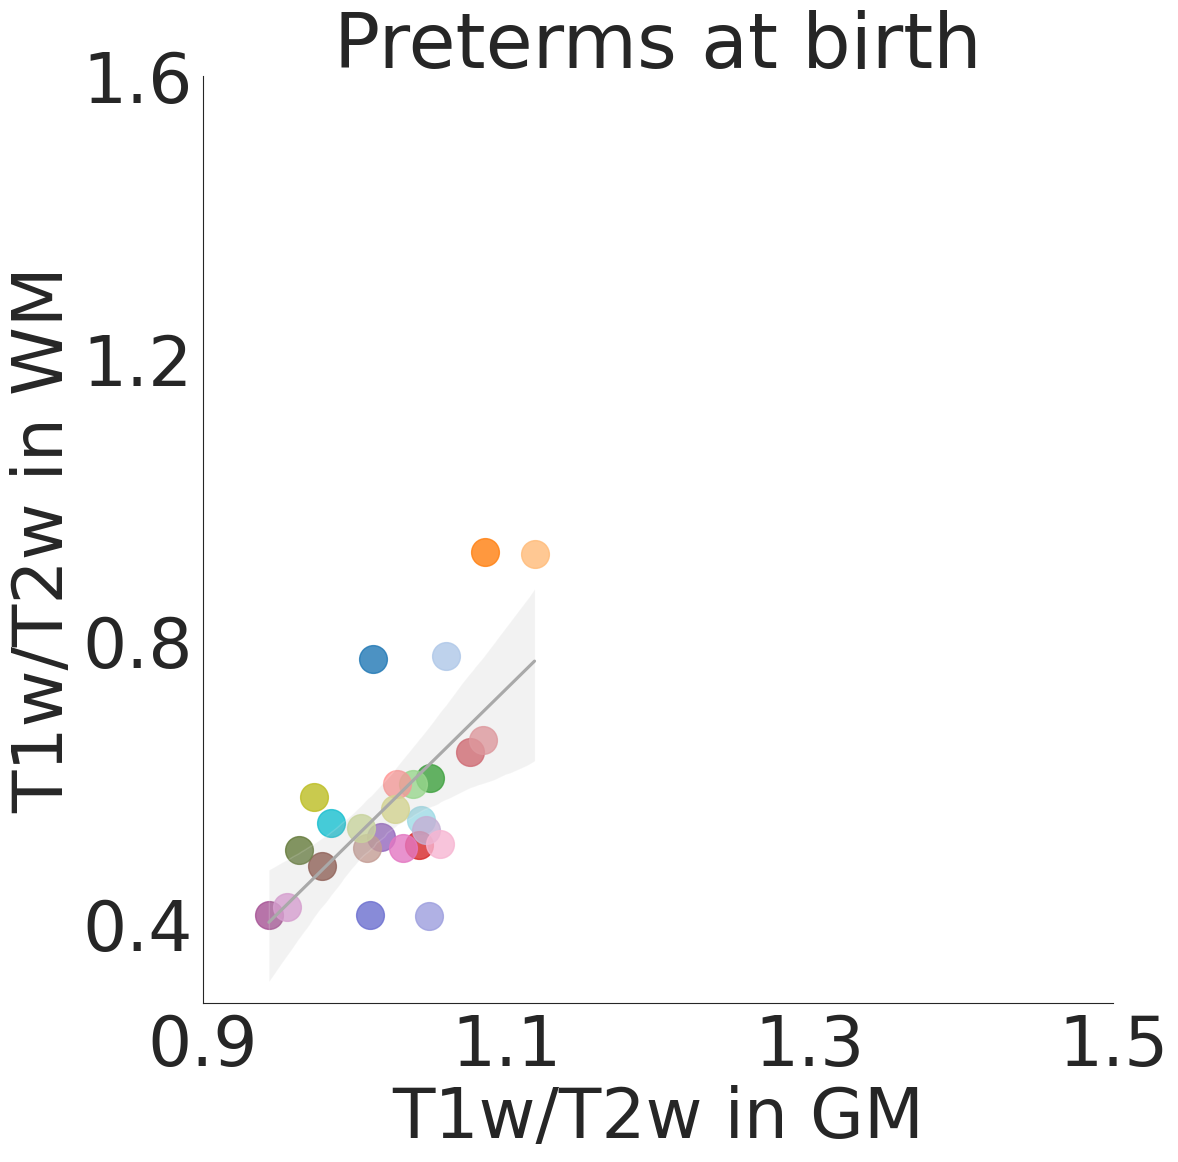

In [235]:
#Plot correlation of preterms at birth
sns.set_style('white');
fig1=sns.lmplot(
    data=PretermMatchedMean, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=PretermMatchedMean, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(PretermMatchedMean['WeAvGMT1wT2w'], PretermMatchedMean['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
fig1.set_title('Preterms at birth', fontsize=55)
plt.savefig('./figures/PretermMatchedMean.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.7339378082504551, pvalue=1.979237498903441e-05)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.000000000000007, 0.5, 'T1w/T2w in WM')

([<matplotlib.axis.XTick at 0x7fc9afe687f0>,
 [Text(0.9, 0, '0.9'),
  Text(1.1, 0, '1.1'),
  Text(1.3, 0, '1.3'),
  Text(1.5, 0, '1.5')])

([<matplotlib.axis.YTick at 0x7fc9b55cebe0>,
 [Text(0, 0.4, '0.4'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'Preterms ≥ 37 weeks')

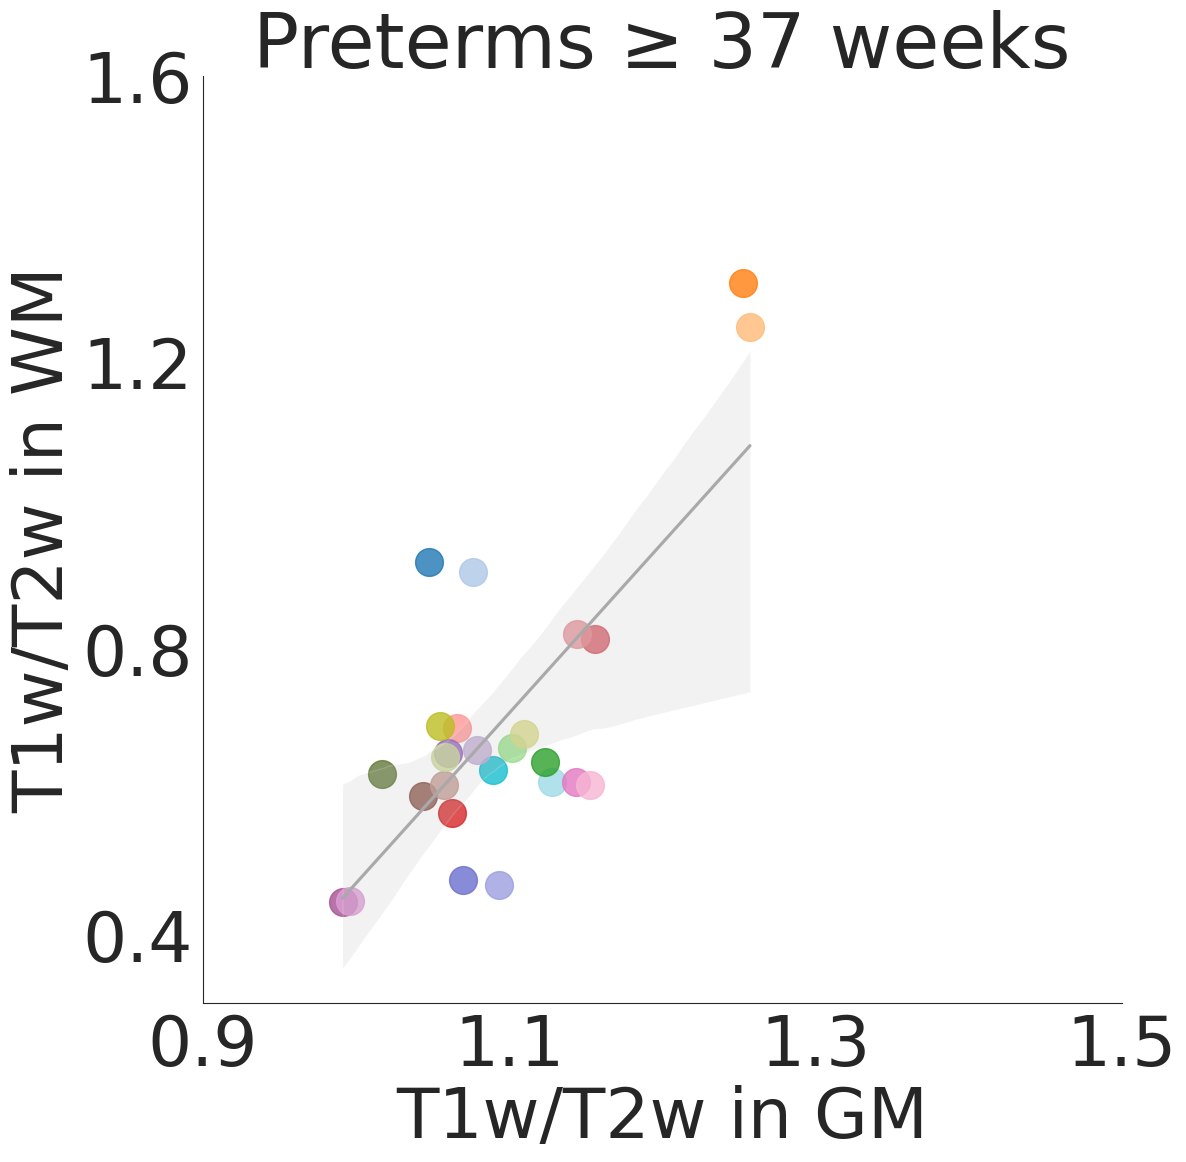

In [236]:
#Plot correlation of preterms at second scan
sns.set_style('white');
fig1=sns.lmplot(
    data=PretermAtFulltermMean, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=PretermAtFulltermMean, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(PretermAtFulltermMean['WeAvGMT1wT2w'], PretermAtFulltermMean['t1wt2w'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
fig1.set_title('Preterms ≥ 37 weeks', fontsize=55)
plt.savefig('./figures/PretermAtFullterm.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.7260113154825626, pvalue=2.6898934906446187e-05)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(28.875000000000007, 0.5, 'T1w/T2w in WM')

([<matplotlib.axis.XTick at 0x7fc9b3aedf10>,
 [Text(0.9, 0, '0.9'),
  Text(1.1, 0, '1.1'),
  Text(1.3, 0, '1.3'),
  Text(1.5, 0, '1.5')])

([<matplotlib.axis.YTick at 0x7fca0904a9a0>,
 [Text(0, 0.4, '0.4'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'Matched fullterms')

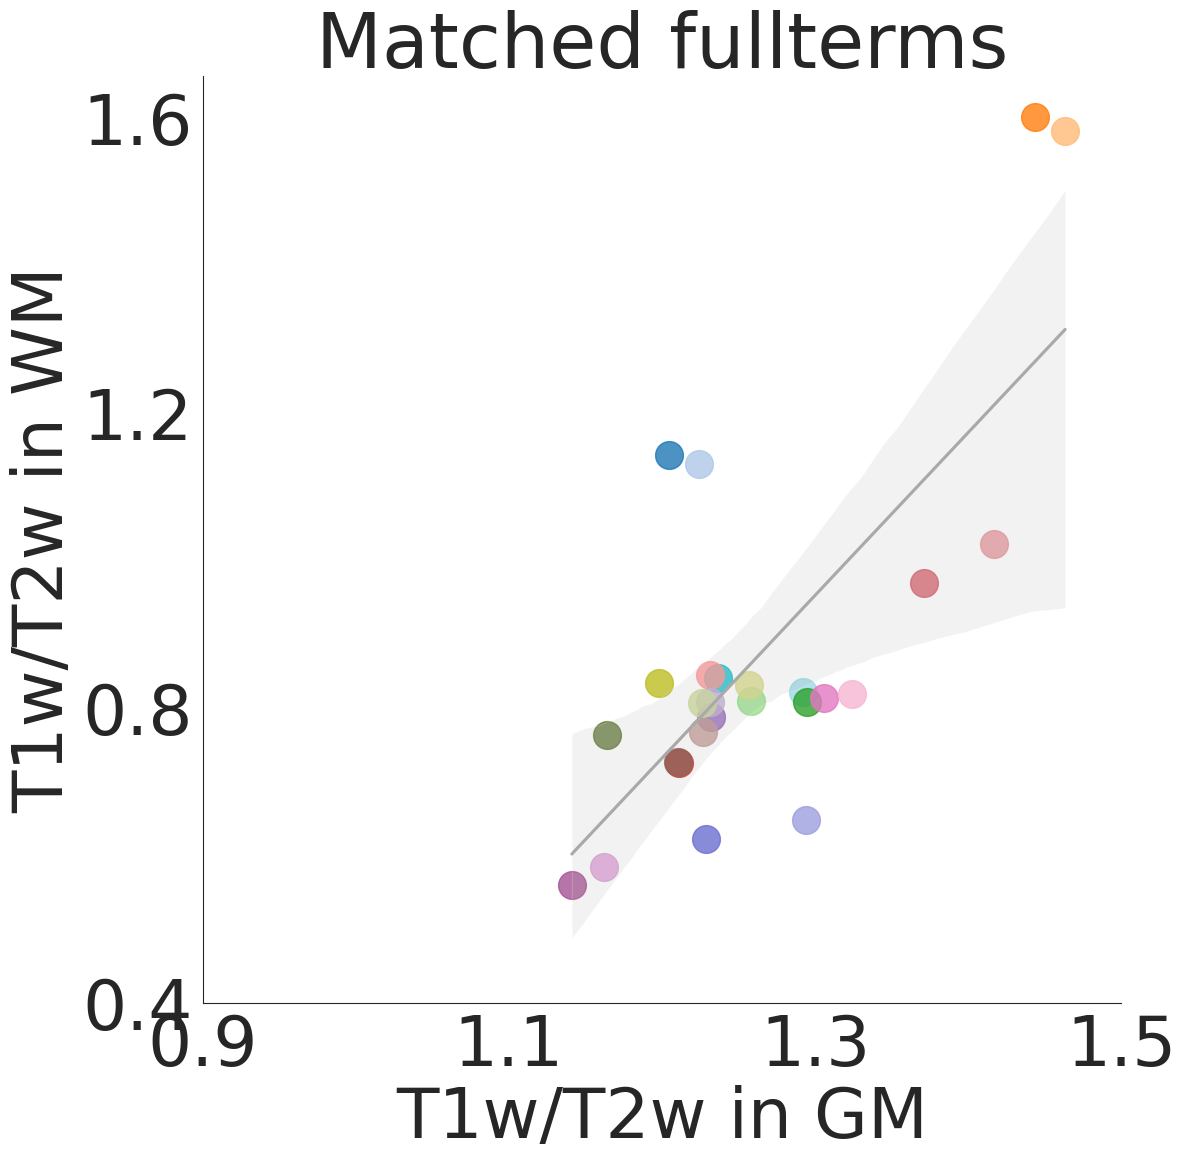

In [237]:
#Plot correlation of matched fullterms
sns.set_style('white');
fig1=sns.lmplot(
    data=MatchedFullTermsMean, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=MatchedFullTermsMean, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(MatchedFullTermsMean['WeAvGMT1wT2w'], MatchedFullTermsMean['t1wt2w'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
fig1.set_title('Matched fullterms', fontsize=55)
plt.savefig('./figures/MatchedFullterms.png', dpi=600, bbox_inches = "tight")

lower bound: -0.0801970679519306
upper bound: -0.07317329000275366
mean_diff: -0.07820595864442169


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   6., 205., 134.,  90., 159., 157., 108.,  18.,  41.,
         28.,  11.,   6.,   7.,   3.,   2.,   4.,   3.,   2.,   1.,   1.,
          2.,   2.,   1.,   1.,   3.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.0882454 , -0.0876838 , -0.0871222 , -0.08656059, -0.08599899,
        -0.08543739, -0.08487579, -0.08431419, -0.08375259, -0.08319099,
        -0.08262939, -0.08206779, -0.08150619, -0.08094459, -0.08038298,
        -0.07982138, -0.07925978, -0.07869818, -0.07813658, -0.07757498,
        -0.07701338, -0.07

Text(0.5, 0, 'Bootstrap Correlation Differences')

(-0.09105340203009792, -0.076)

(-0.083, -0.076)

(array([-0.083, -0.082, -0.081, -0.08 , -0.079, -0.078, -0.077, -0.076]),
 [Text(-0.083, 0, '−0.083'),
  Text(-0.082, 0, '−0.082'),
  Text(-0.081, 0, '−0.081'),
  Text(-0.08, 0, '−0.080'),
  Text(-0.079, 0, '−0.079'),
  Text(-0.078, 0, '−0.078'),
  Text(-0.077, 0, '−0.077'),
  Text(-0.07600000000000001, 0, '−0.076')])

Text(0, 0.5, 'Frequency')

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200'),
  Text(0, 225.0, '225')])

Text(0.5, 1.0, 'Preterms at birth vs. Preterms ≥ 37 weeks')

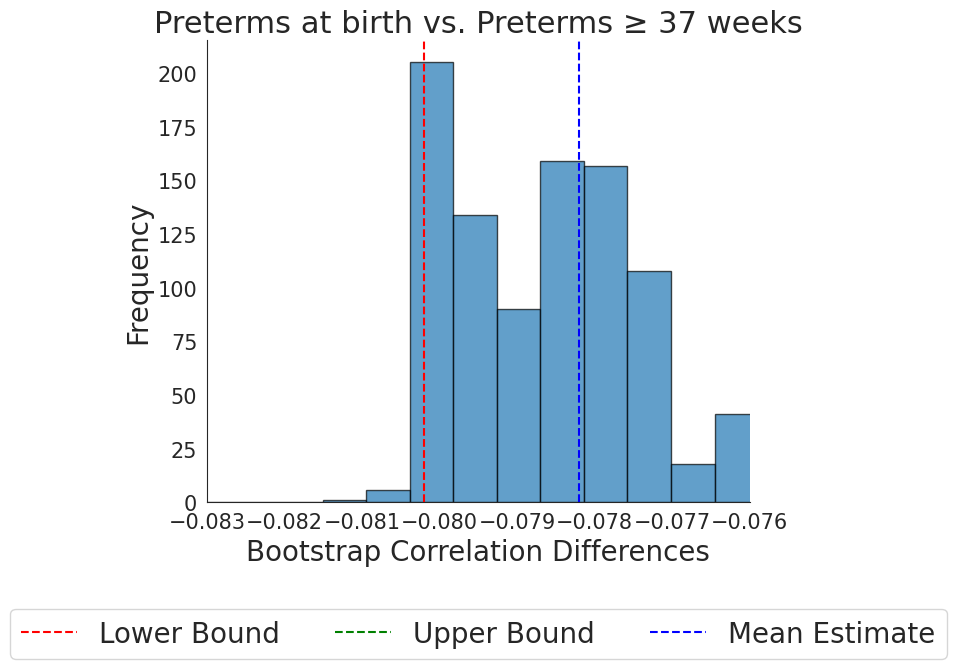

In [150]:
#Premature infants after birth vs. Premature infants at second scan

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from itertools import count, islice

x1 = PretermMatched
y1 = PretermAtFullterm

data = []
n = 26
df1 = []
df2 = []
diff_correlations = []
confidence_level=95

# Creating a list of numbers from 5 to 10
numbers = list(islice(count(1), 1000))

for _ in numbers:
    resample_indices = np.random.choice(26, size=26, replace=True)
    for subj in resample_indices:
        x1["SubjectNumber"]=x1['SubjectNumber'].apply(int)
        df_x = x1[x1['SubjectNumber']==subj]
        df1.append(df_x)
        y1["SubjectNumber"]=y1['SubjectNumber'].apply(int)
        df_y = y1[y1['SubjectNumber']==subj]
        df2.append(df_y)            
        
    df1_boot = pd.concat(df1)
    #df1_boot
    df2_boot = pd.concat(df2)
    #df2_boot
    df1_boot_mean = df1_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df1_boot_mean
    df2_boot_mean = df2_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df2_boot_mean
    
    r1 = pearsonr(df1_boot_mean['t1wt2w'], df1_boot_mean['WeAvGMT1wT2w'])[0]
    r2 = pearsonr(df2_boot_mean['t1wt2w'], df2_boot_mean['WeAvGMT1wT2w'])[0]
    observed_diff = r1 - r2
    #print(observed_diff)
    diff_correlations.append(observed_diff)
    
# Compute confidence intervals
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile
confidence_interval = np.percentile(diff_correlations, [lower_percentile, upper_percentile])
print("lower bound:",confidence_interval[0])
print("upper bound:",confidence_interval[1])
mean_diff = np.mean(diff_correlations)
print("mean_diff:", mean_diff)
    
# Plot histogram of bootstrap differences
from matplotlib import ticker
fig,ax = plt.subplots(figsize=(7,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
plt.hist(diff_correlations, bins=100, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', label='Upper Bound')
plt.axvline(mean_diff, color='blue', linestyle='dashed', label='Mean Estimate')
#plt.axvline(0, color='purple', linestyle='dashed', label='Zero')
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize = 20)
plt.xlabel('Bootstrap Correlation Differences', fontsize = 20)
plt.xlim(right=-0.076)
plt.xlim(left=-0.083)
plt.xticks(fontsize = 15)
#plt.tick_params(axis='x', top=False)
plt.ylabel('Frequency',fontsize = 20)
plt.yticks(fontsize = 15)
#plt.tick_params(axis='y', right=False)
plt.title('Preterms at birth vs. Preterms ≥ 37 weeks', fontsize = 22)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.savefig('./figures/Bootstrap_PremiesPremiesFullTerm.png', dpi=600, bbox_inches = "tight")
plt.show()

lower bound: -0.07106605054079977
upper bound: -0.06395943116900378
mean_diff: -0.06970640226678941


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,  65., 270., 293., 122.,  62.,
         64.,  24.,  22.,   4.,   6.,   7.,   7.,   7.,   9.,   7.,   6.,
          5.,   4.,   3.,   4.,   2.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.09606074, -0.09556902, -0.0950773 , -0.09458557, -0.09409385,
        -0.09360212, -0.0931104 , -0.09261868, -0.09212695, -0.09163523,
        -0.0911435 , -0.09065178, -0.09016006, -0.08966833, -0.08917661,
        -0.08868488, -0.08819316, -0.08770144, -0.08720971, -0.08671799,
        -0.08622626, -0.08

Text(0.5, 0, 'Bootstrap Correlation Differences')

(-0.09851936429017868, -0.06)

(-0.08, -0.06)

(array([-0.08  , -0.0775, -0.075 , -0.0725, -0.07  , -0.0675, -0.065 ,
        -0.0625, -0.06  ]),
 [Text(-0.08, 0, '−0.080'),
  Text(-0.0775, 0, '−0.077'),
  Text(-0.075, 0, '−0.075'),
  Text(-0.07250000000000001, 0, '−0.073'),
  Text(-0.07, 0, '−0.070'),
  Text(-0.0675, 0, '−0.068'),
  Text(-0.065, 0, '−0.065'),
  Text(-0.0625, 0, '−0.062'),
  Text(-0.06, 0, '−0.060')])

Text(0, 0.5, 'Frequency')

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350')])

Text(0.5, 1.0, 'Preterms at birth vs. Matched fullterms')

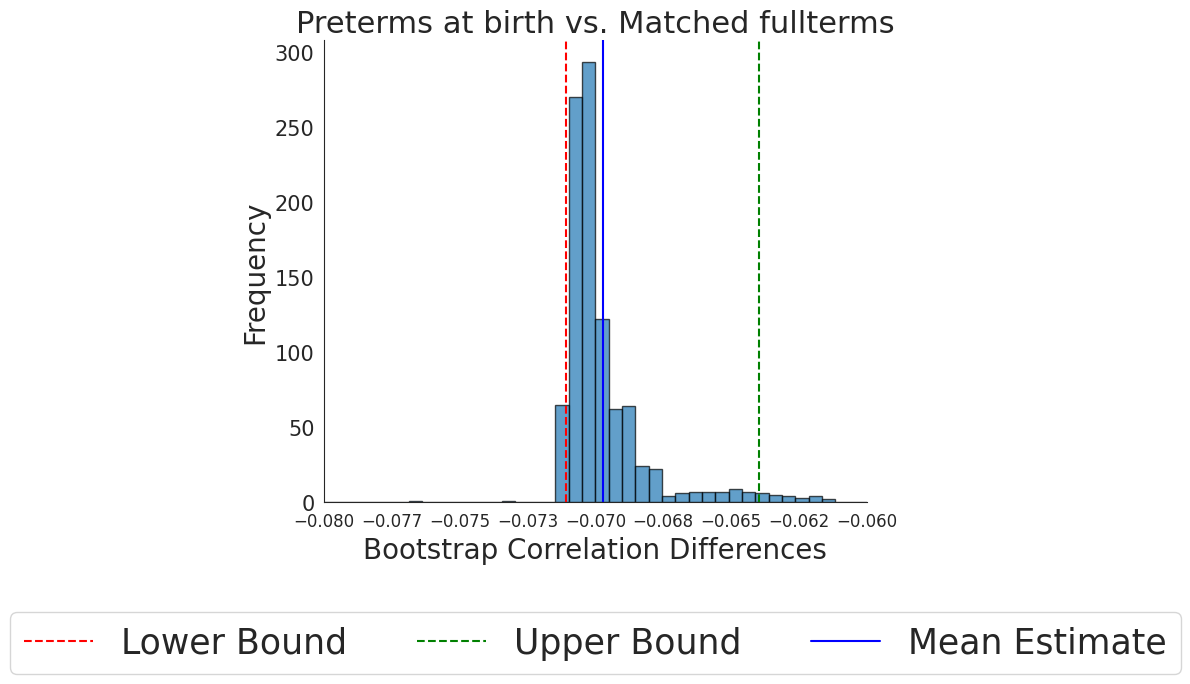

In [149]:
#Premature infants after birth vs. Fullterm infants
x1 = PretermMatched
y1 = MatchedFullTerms

data = []
n = 26
df1 = []
df2 = []
diff_correlations = []
confidence_level=95


# Creating a list of numbers from 1 to 1000
numbers = list(islice(count(1), 1000))

for _ in numbers:
    resample_indices = np.random.choice(26, size=26, replace=True)
    for subj in resample_indices:
        x1["SubjectNumber"]=x1['SubjectNumber'].apply(int)
        df_x = x1[x1['SubjectNumber']==subj]
        df1.append(df_x)
        y1["SubjectNumber"]=y1['SubjectNumber'].apply(int)
        df_y = y1[y1['SubjectNumber']==subj]
        df2.append(df_y)            
        
    df1_boot = pd.concat(df1)
    #df1_boot
    df2_boot = pd.concat(df2)
    #df2_boot
    df1_boot_mean = df1_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df1_boot_mean
    df2_boot_mean = df2_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df2_boot_mean
    
    r1 = pearsonr(df1_boot_mean['t1wt2w'], df1_boot_mean['WeAvGMT1wT2w'])[0]
    r2 = pearsonr(df2_boot_mean['t1wt2w'], df2_boot_mean['WeAvGMT1wT2w'])[0]
    observed_diff = r1 - r2
    #print(observed_diff)
    diff_correlations.append(observed_diff)
    
# Compute confidence intervals
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile
confidence_interval = np.percentile(diff_correlations, [lower_percentile, upper_percentile])
print("lower bound:",confidence_interval[0])
print("upper bound:",confidence_interval[1])
mean_diff = np.mean(diff_correlations)
print("mean_diff:", mean_diff)
    
# Plot histogram of bootstrap differences
from matplotlib import ticker
fig,ax = plt.subplots(figsize=(7,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
plt.hist(diff_correlations, bins=100, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', label='Upper Bound')
plt.axvline(mean_diff, color='blue', linestyle='solid', label='Mean Estimate')
#plt.axvline(0, color='purple', linestyle='dashed', label='Zero')
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize = 25)
plt.xlabel('Bootstrap Correlation Differences', fontsize=20)
plt.xlim(right=-0.060)
plt.xlim(left=-0.080)
plt.xticks(fontsize = 12)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize = 15)
plt.title('Preterms at birth vs. Matched fullterms', fontsize=22)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.savefig('./figures/Bootstrap_PremiesFullterm.png', dpi=600, bbox_inches = "tight")
plt.show()

lower bound: -0.0009315790425246576
upper bound: 0.008016181650307036
mean_diff: 0.006319786886690015


(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   1.,
          3.,   1.,   1.,   5.,   0.,   5.,   6.,   3.,   7.,   7.,   4.,
          5.,   5.,   3.,   9.,  11.,  20.,  23., 169., 408., 246.,  51.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.01182881, -0.01121864, -0.01060847, -0.00999831, -0.00938814,
        -0.00877797, -0.0081678 , -0.00755763, -0.00694746, -0.00633729,
        -0.00572712, -0.00511695, -0.00450678, -0.00389661, -0.00328644,
        -0.00267627, -0.0020661 , -0.00145593, -0.00084576, -0.00023559,
         0.00037458,  0.00

Text(0.5, 0, 'Bootstrap Correlation Differences')

(-0.014879661185960114, 0.014)

(0.0, 0.014)

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014]),
 [Text(0.0, 0, '0.000'),
  Text(0.002, 0, '0.002'),
  Text(0.004, 0, '0.004'),
  Text(0.006, 0, '0.006'),
  Text(0.008, 0, '0.008'),
  Text(0.01, 0, '0.010'),
  Text(0.012, 0, '0.012'),
  Text(0.014, 0, '0.014')])

Text(0, 0.5, 'Frequency')

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400'),
  Text(0, 450.0, '450')])

Text(0.5, 1.0, 'Preterms ≥ 37 weeks vs. Matched fullterm')

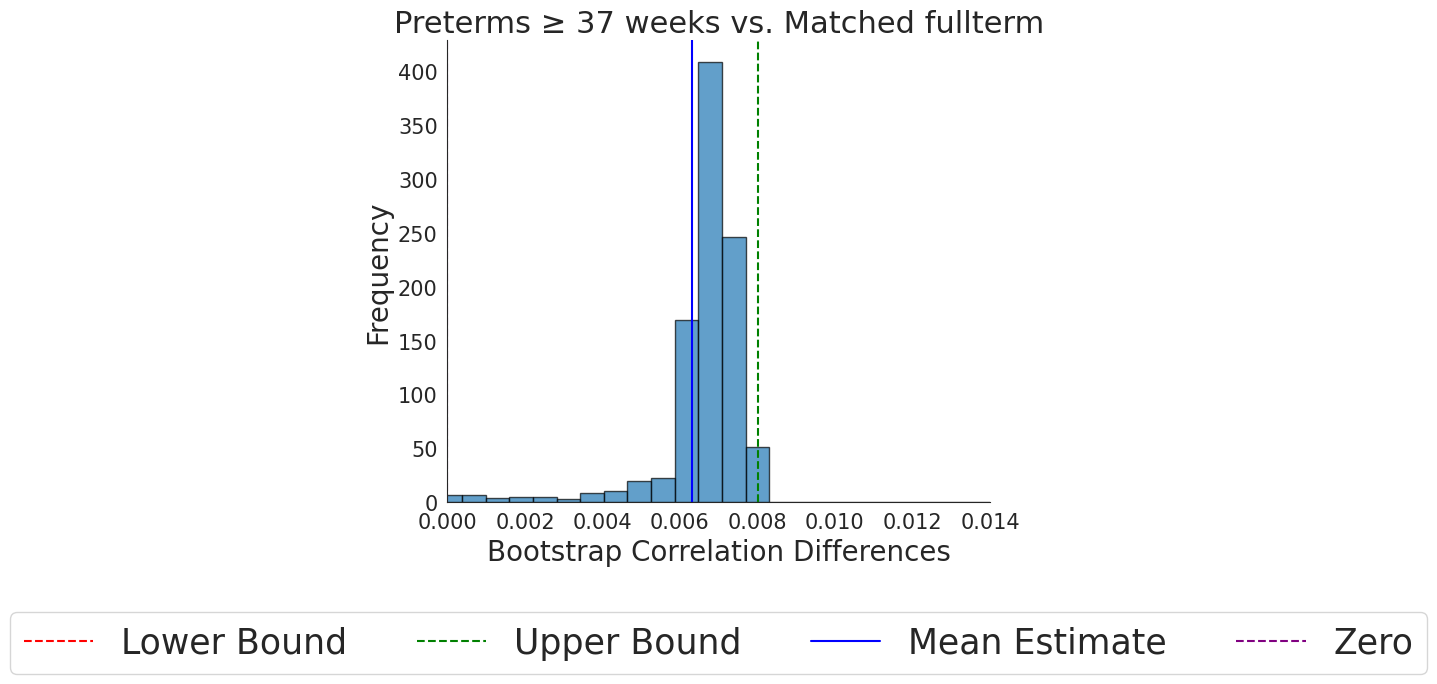

In [148]:
#Preterm at second scan vs. fullterm infants

x1 = PretermAtFullterm
y1 = MatchedFullTerms

data = []
n = 26
df1 = []
df2 = []
diff_correlations = []
confidence_level=95


# Creating a list of numbers from 1 to 1000
numbers = list(islice(count(1), 1000))

for _ in numbers:
    resample_indices = np.random.choice(26, size=26, replace=True)
    for subj in resample_indices:
        x1["SubjectNumber"]=x1['SubjectNumber'].apply(int)
        df_x = x1[x1['SubjectNumber']==subj]
        df1.append(df_x)
        y1["SubjectNumber"]=y1['SubjectNumber'].apply(int)
        df_y = y1[y1['SubjectNumber']==subj]
        df2.append(df_y)            
        
    df1_boot = pd.concat(df1)
    #df1_boot
    df2_boot = pd.concat(df2)
    #df2_boot
    df1_boot_mean = df1_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df1_boot_mean
    df2_boot_mean = df2_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df2_boot_mean
    
    r1 = pearsonr(df1_boot_mean['t1wt2w'], df1_boot_mean['WeAvGMT1wT2w'])[0]
    r2 = pearsonr(df2_boot_mean['t1wt2w'], df2_boot_mean['WeAvGMT1wT2w'])[0]
    observed_diff = r1 - r2
    #print(observed_diff)
    diff_correlations.append(observed_diff)
    
# Compute confidence intervals
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile
confidence_interval = np.percentile(diff_correlations, [lower_percentile, upper_percentile])
print("lower bound:",confidence_interval[0])
print("upper bound:",confidence_interval[1])
mean_diff = np.mean(diff_correlations)
print("mean_diff:", mean_diff)
    
from matplotlib import ticker
fig,ax = plt.subplots(figsize=(7,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
plt.hist(diff_correlations, bins=100, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', label='Upper Bound')
plt.axvline(mean_diff, color='blue', linestyle='solid', label='Mean Estimate')
plt.axvline(0, color='purple', linestyle='dashed', label='Zero')
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize = 25)
plt.xlabel('Bootstrap Correlation Differences', fontsize=20)
plt.xlim(right=0.014)
plt.xlim(left=0.000)
plt.xticks(fontsize = 15)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize = 15)
plt.title('Preterms ≥ 37 weeks vs. Matched fullterm', fontsize=22)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.savefig('./figures/Bootstrap_PremiesFulltermFullterm.png', dpi=600, bbox_inches = "tight")
plt.show()

## Supplementary figures

PearsonRResult(statistic=0.10310797121630559, pvalue=0.14124290030420347)

Text(0.5, 29.140624999999986, 'Motor Scores')

Text(28.875000000000007, 0.5, 'T1w/T2w in GM')

(array([12., 14., 16., 18., 20., 22., 24., 26., 28., 30.]),
 [Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20'),
  Text(22.0, 0, '22'),
  Text(24.0, 0, '24'),
  Text(26.0, 0, '26'),
  Text(28.0, 0, '28'),
  Text(30.0, 0, '30')])

(array([0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]),
 [Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.3, '1.3'),
  Text(0, 1.4, '1.4'),
  Text(0, 1.5, '1.5'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'Motor Subscale')

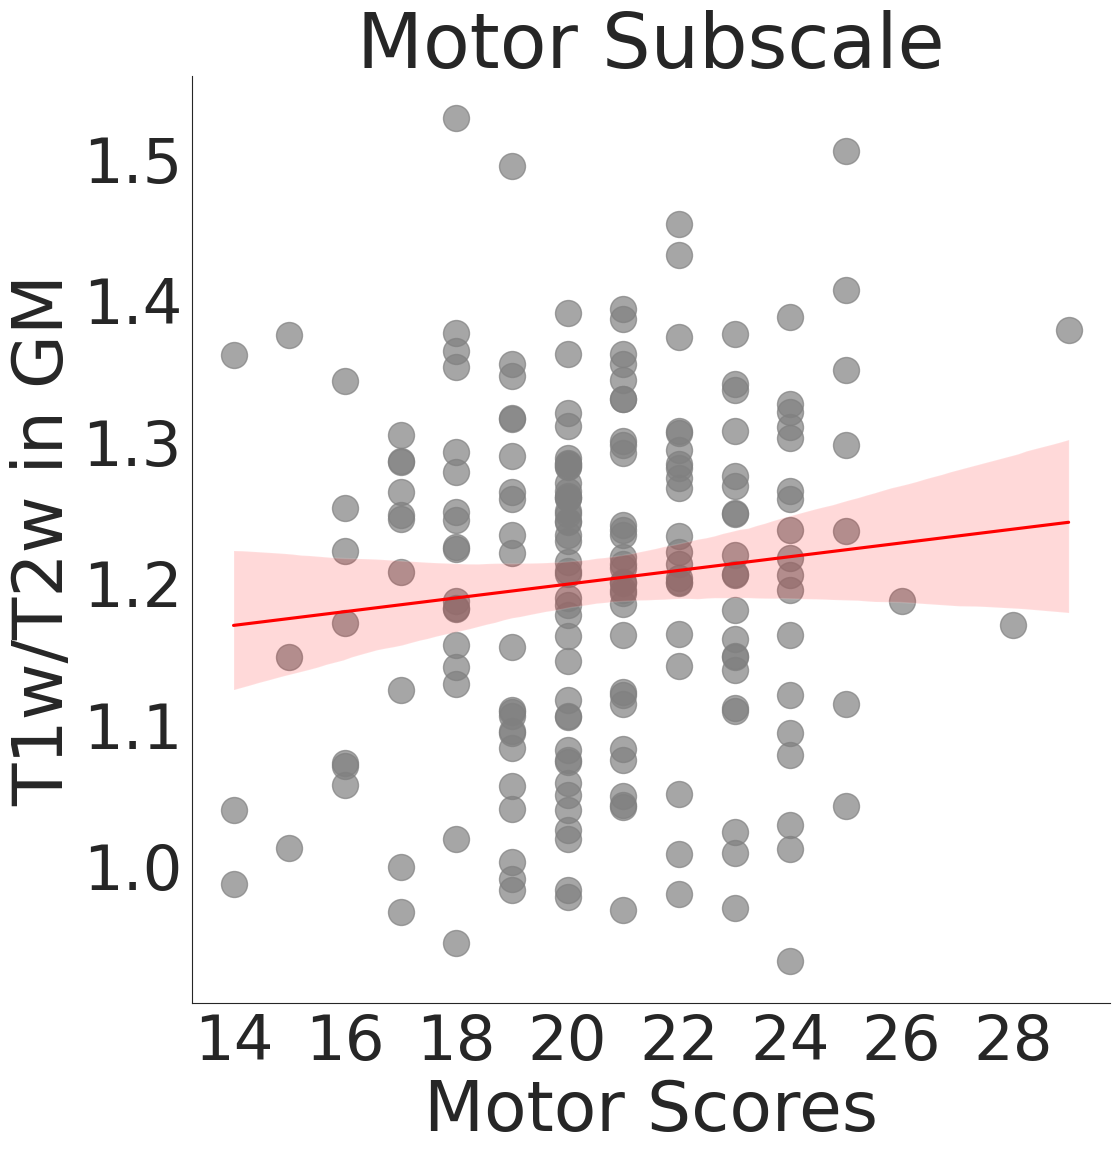

In [223]:
# motor scores and cortical T1w/T2w 

sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleaned, x='bsid_mot_sumscaled', y="WeAvGMT1wT2w", scatter_kws={"s": 350, "color":"gray", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleaned, x='bsid_mot_sumscaled', y="WeAvGMT1wT2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleaned['bsid_mot_sumscaled'], BehavDataAllScoresR2s_cleaned['WeAvGMT1wT2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Motor Scores", fontsize=50)
plt.ylabel("T1w/T2w in GM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Motor Subscale', fontsize=55)

plt.savefig('./figures/GM_motor_cleaned.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=-0.011679505812861297, pvalue=0.8667077918026294)

Text(0.5, 29.140624999999986, 'Cognition Scores')

Text(28.875000000000007, 0.5, 'T1w/T2w in GM')

(array([ 4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16')])

(array([0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]),
 [Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.3, '1.3'),
  Text(0, 1.4, '1.4'),
  Text(0, 1.5, '1.5'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'Cognition Subscale')

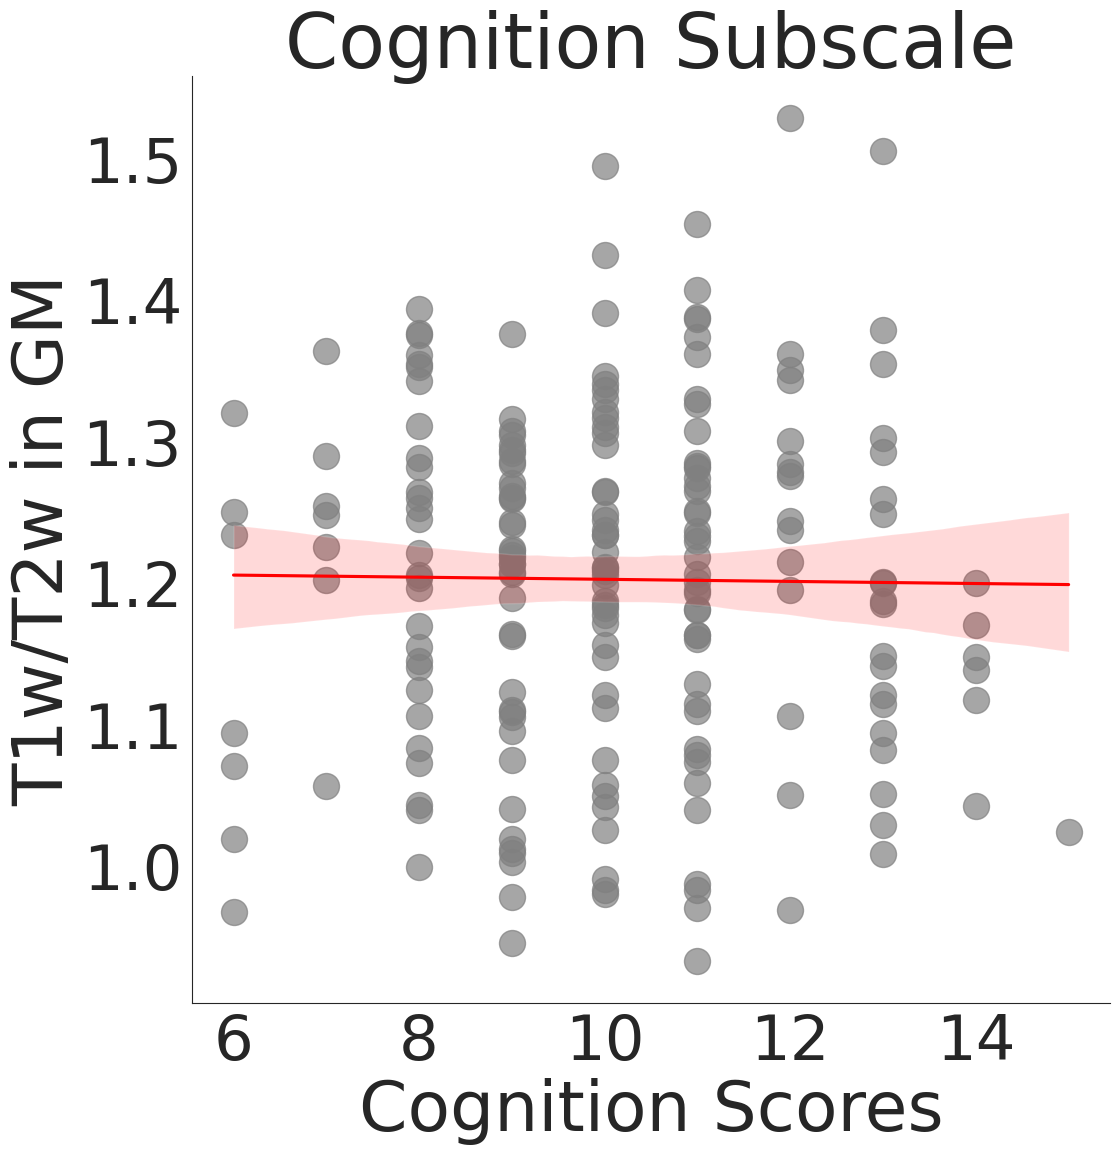

In [224]:
# cognition scores and cortical T1w/T2w 

sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleanedcognition, x='bsid_cog_sumscaled', y="WeAvGMT1wT2w", scatter_kws={"s": 350, "color":"gray", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleanedcognition, x='bsid_cog_sumscaled', y="WeAvGMT1wT2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleanedcognition['bsid_cog_sumscaled'], BehavDataAllScoresR2s_cleanedcognition['WeAvGMT1wT2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Cognition Scores", fontsize=50)
plt.ylabel("T1w/T2w in GM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Cognition Subscale', fontsize=55)

plt.savefig('./figures/GM_cognition_cleaned.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=-0.009176115109374343, pvalue=0.8948390475066911)

Text(0.5, 29.140624999999986, 'Language Scores')

Text(28.875000000000007, 0.5, 'T1w/T2w in GM')

(array([ 5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

(array([0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]),
 [Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.3, '1.3'),
  Text(0, 1.4, '1.4'),
  Text(0, 1.5, '1.5'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'Language Subscale')

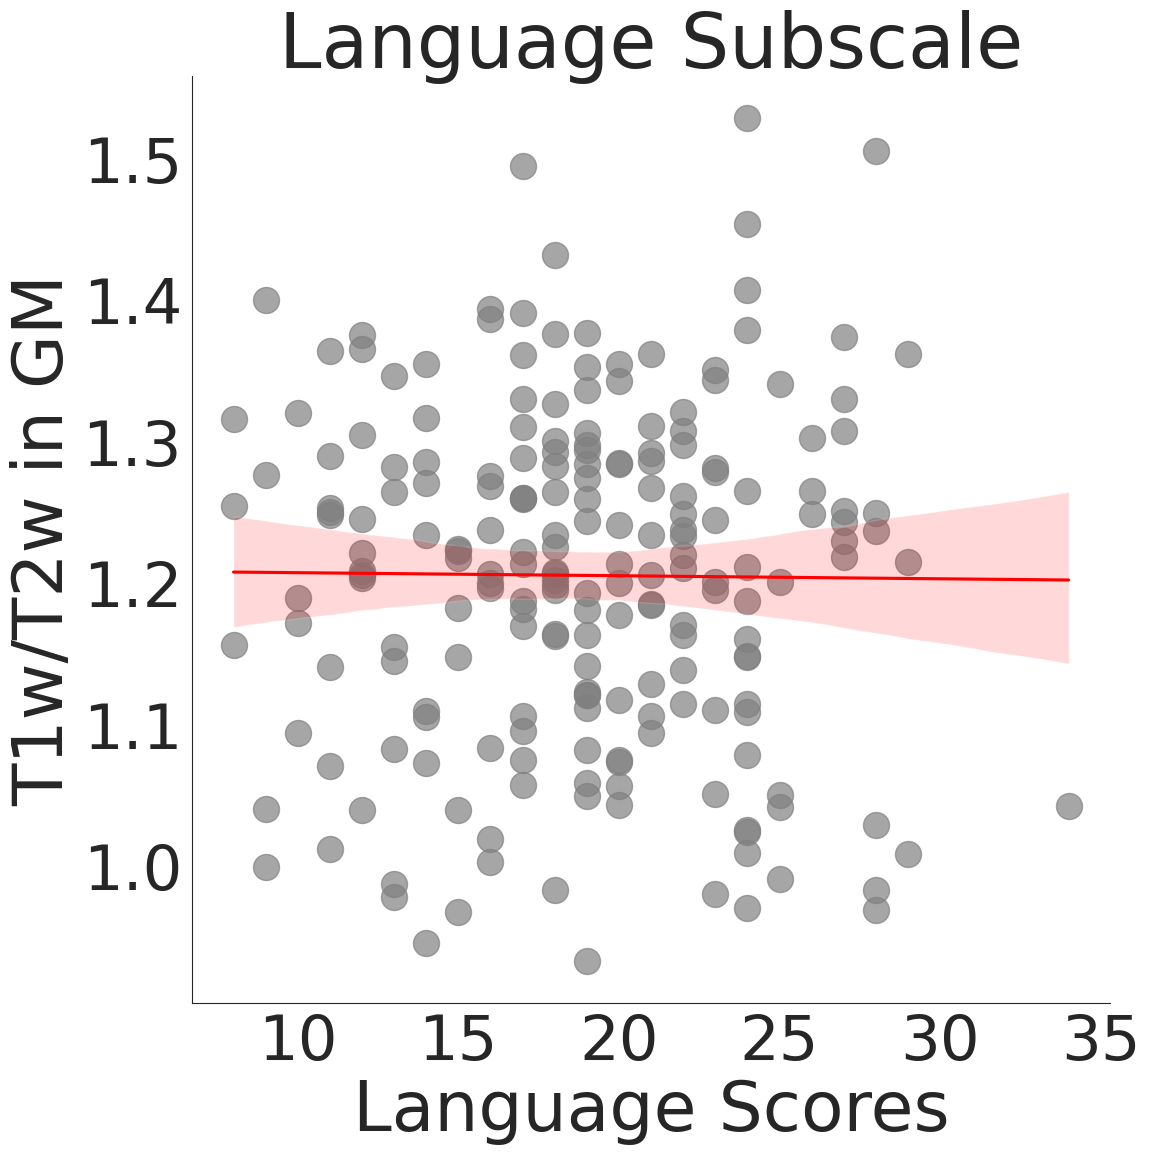

In [225]:
# language scores and cortical T1w/T2w 

sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleanedlanguage, x='bsid_lang_sumscaled', y="WeAvGMT1wT2w", scatter_kws={"s": 350, "color":"gray", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleanedlanguage, x='bsid_lang_sumscaled', y="WeAvGMT1wT2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleanedlanguage['bsid_lang_sumscaled'], BehavDataAllScoresR2s_cleanedlanguage['WeAvGMT1wT2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Language Scores", fontsize=50)
plt.ylabel("T1w/T2w in GM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Language Subscale', fontsize=55)

plt.savefig('./figures/GM_language_cleaned.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.12347755569114012, pvalue=0.07775296873835115)

Text(0.5, 29.140624999999986, 'Motor Scores')

Text(28.875000000000007, 0.5, 'T1w/T2w in WM')

(array([12., 14., 16., 18., 20., 22., 24., 26., 28., 30.]),
 [Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20'),
  Text(22.0, 0, '22'),
  Text(24.0, 0, '24'),
  Text(26.0, 0, '26'),
  Text(28.0, 0, '28'),
  Text(30.0, 0, '30')])

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
 [Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2000000000000002, '1.2')])

Text(0.5, 1.0, 'Motor Subscale')

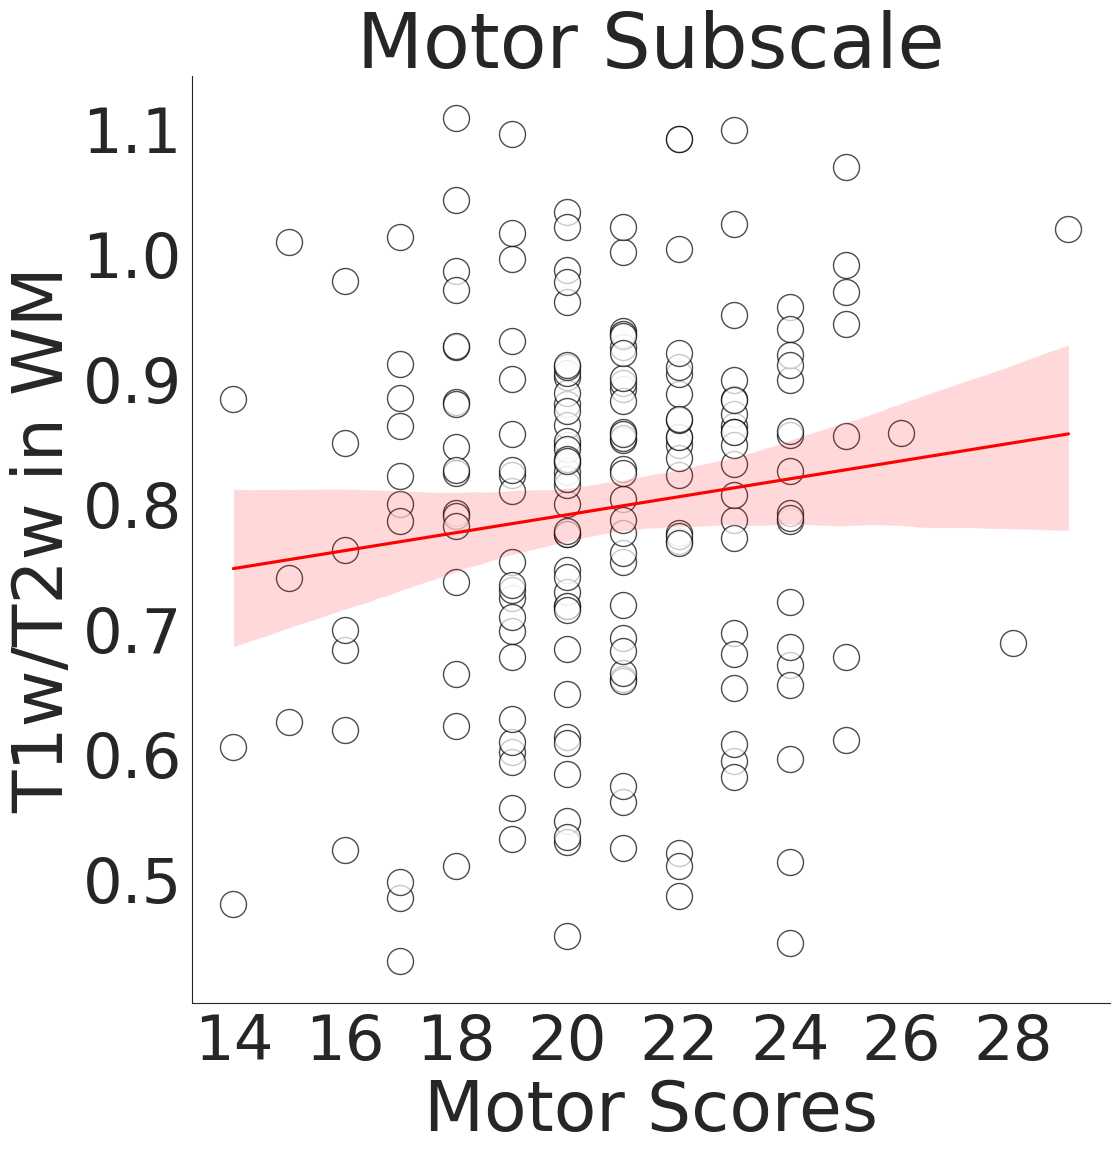

In [226]:
# motor score and white matter T1w/T2w

sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleaned, x='bsid_mot_sumscaled', y="t1wt2w", scatter_kws={"s": 350, "color":"white", "alpha":0.7, 'edgecolor':'black'}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleaned, x='bsid_mot_sumscaled', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleaned['bsid_mot_sumscaled'], BehavDataAllScoresR2s_cleaned['t1wt2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Motor Scores", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Motor Subscale', fontsize=55)

plt.savefig('./figures/WM_motor_cleaned.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.04676511977326092, pvalue=0.501336205860599)

Text(0.5, 29.140624999999986, 'Cognition Scores')

Text(28.875000000000007, 0.5, 'T1w/T2w in WM')

(array([ 4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16')])

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
 [Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2000000000000002, '1.2')])

Text(0.5, 1.0, 'Cognition Subscale')

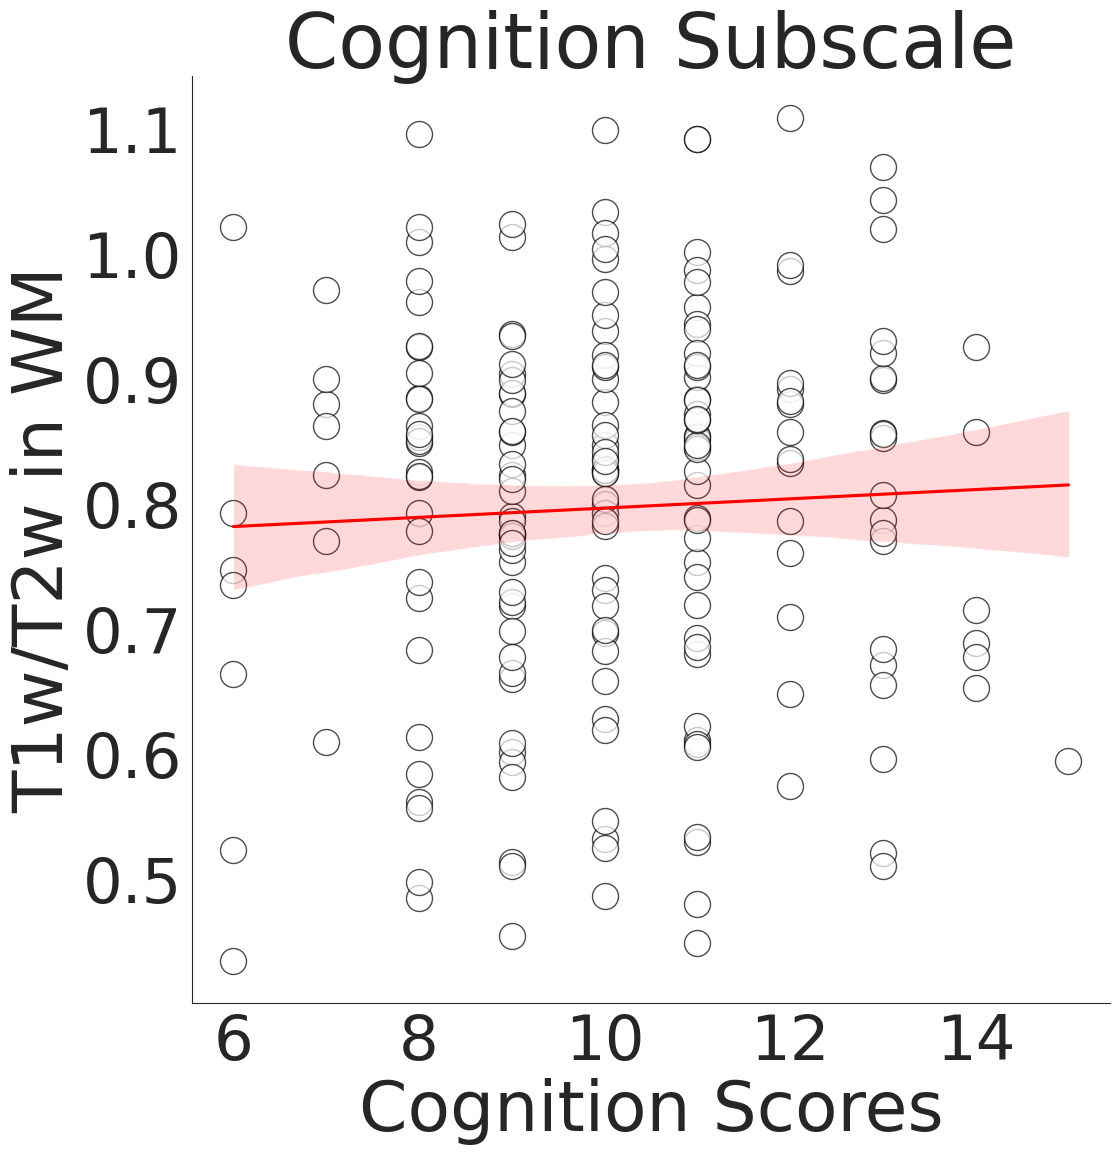

In [227]:
# cognition score and white matter T1w/T2w

sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleanedcognition, x='bsid_cog_sumscaled', y="t1wt2w", scatter_kws={"s": 350, "color":"white", "alpha":0.7, 'edgecolor':'black'}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleanedcognition, x='bsid_cog_sumscaled', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleanedcognition['bsid_cog_sumscaled'], BehavDataAllScoresR2s_cleanedcognition['t1wt2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Cognition Scores", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Cognition Subscale', fontsize=55)

plt.savefig('./figures/WM_cognition_cleaned.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.018646123695035908, pvalue=0.788223230875727)

Text(0.5, 29.140624999999986, 'Language Scores')

Text(28.875000000000007, 0.5, 'T1w/T2w in WM')

(array([ 5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
 [Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2000000000000002, '1.2')])

Text(0.5, 1.0, 'Language Subscale')

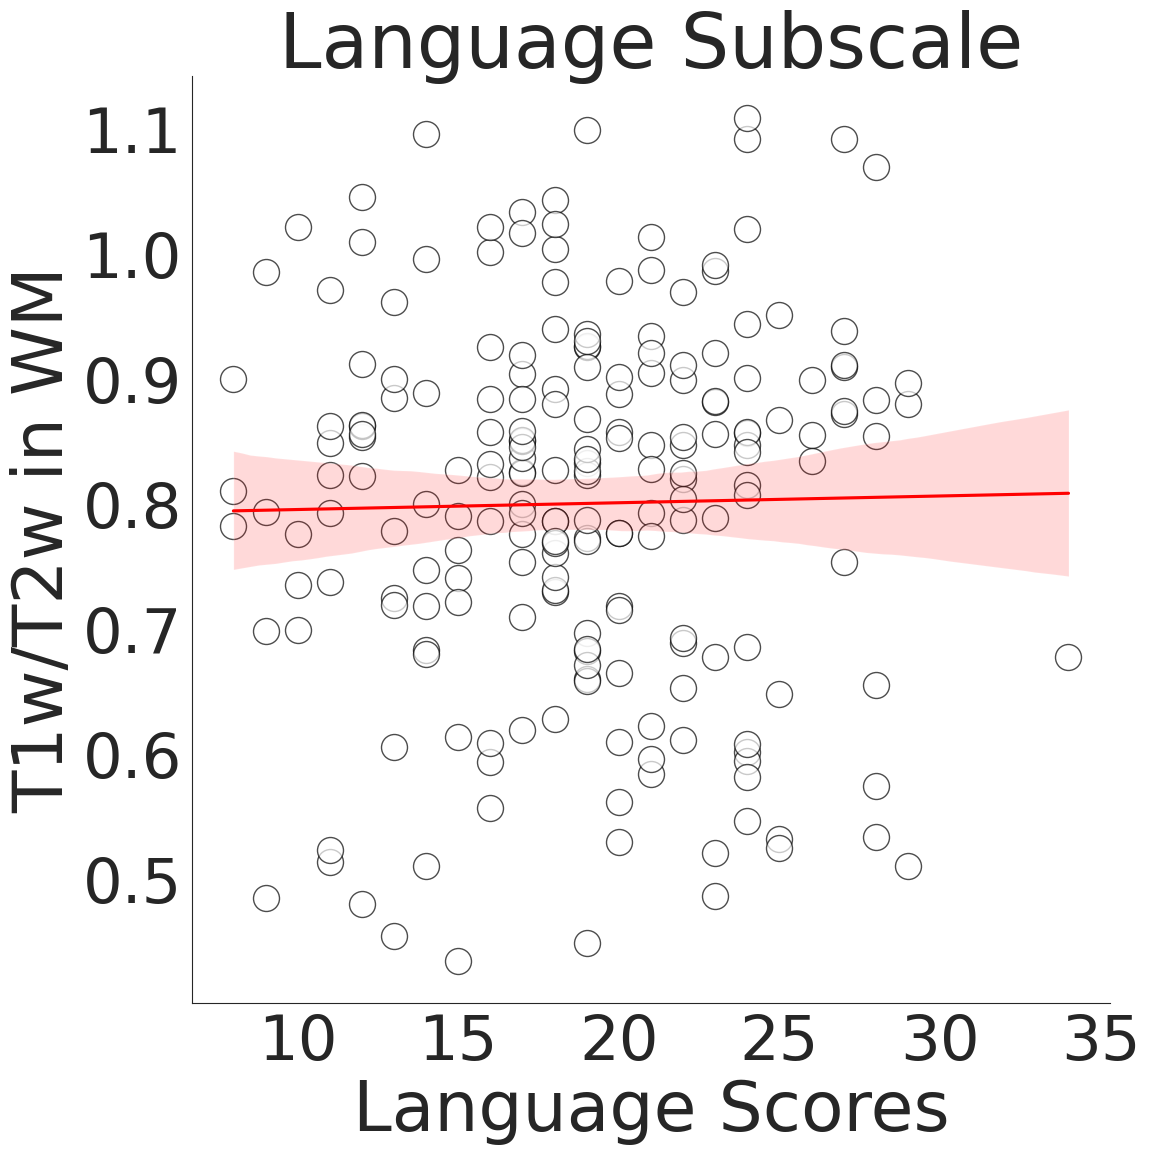

In [228]:
# language score and white matter T1w/T2w

sns.set_style('white');
fig1=sns.lmplot(
    data=BehavDataAllScoresR2s_cleanedlanguage, x='bsid_lang_sumscaled', y="t1wt2w", scatter_kws={"s": 350, "color":"white", "alpha":0.7, 'edgecolor':'black'}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=BehavDataAllScoresR2s_cleanedlanguage, x='bsid_lang_sumscaled', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(BehavDataAllScoresR2s_cleanedlanguage['bsid_lang_sumscaled'], BehavDataAllScoresR2s_cleanedlanguage['t1wt2w'])
#spearmanr(LangBehavMyelinCorrAve['bsid_lang_sumscaled'], LangBehavMyelinCorrAve['r2'])
#fig1.legend(title='Tract', fontsize='10', title_fontsize='14', bbox_to_anchor=(0.6, 0.2, 0.5, 0.5), loc='right', borderaxespad=0)
plt.xlabel("Language Scores", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Language Subscale', fontsize=55)

plt.savefig('./figures/WM_language_cleaned.png', dpi=600, bbox_inches = "tight")